## Problem:

For this particular assignment, the data of different types of wine sales in the 20th century is to be analysed. 
Both of these data are from the same company but of different wines. As an analyst in the ABC Estate Wines, you are tasked to analyse and forecast Wine Sales in the 20th century.


Data set for the Problem: Rose.csv



In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import statsmodels

In [2]:
import warnings
warnings.filterwarnings('ignore')

## 1.Read the data as an appropriate Time Series data and plot the data.

In [3]:
df2 = pd.read_csv('Rose.csv') # Reading the data
df2.head()

YearMonth   Rose
0   1980-01  112.0
1   1980-02  118.0
2   1980-03  129.0
3   1980-04   99.0
4   1980-05  116.0

In [4]:
df2.tail()

YearMonth  Rose
182   1995-03  45.0
183   1995-04  52.0
184   1995-05  28.0
185   1995-06  40.0
186   1995-07  62.0

In [5]:
df2.shape

(187, 2)

In [6]:
date = pd.date_range(start='1/1/1980', end='8/1/1995', freq='M')
date

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-10-31', '1994-11-30', '1994-12-31', '1995-01-31',
               '1995-02-28', '1995-03-31', '1995-04-30', '1995-05-31',
               '1995-06-30', '1995-07-31'],
              dtype='datetime64[ns]', length=187, freq='M')

In [7]:
df2['Time_Stamp'] = pd.DataFrame(date,columns=['Month'])
df2.head()

YearMonth   Rose Time_Stamp
0   1980-01  112.0 1980-01-31
1   1980-02  118.0 1980-02-29
2   1980-03  129.0 1980-03-31
3   1980-04   99.0 1980-04-30
4   1980-05  116.0 1980-05-31

In [8]:
df2['Time_Stamp'] = pd.to_datetime(df2['Time_Stamp'])

In [9]:
df = df2.set_index('Time_Stamp')
df.drop(['YearMonth'], axis=1, inplace=True)
df.head()

Rose
Time_Stamp       
1980-01-31  112.0
1980-02-29  118.0
1980-03-31  129.0
1980-04-30   99.0
1980-05-31  116.0

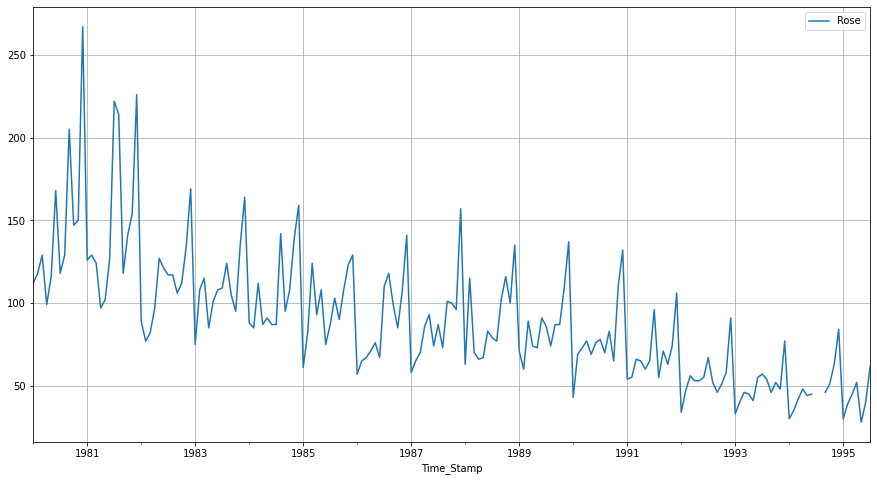

In [10]:
from pylab import rcParams
rcParams['figure.figsize'] = 15,8
df.plot();
plt.grid()

## 2.Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.

In [11]:
df.describe()

Rose
count  185.000000
mean    90.394595
std     39.175344
min     28.000000
25%     63.000000
50%     86.000000
75%    112.000000
max    267.000000

In [12]:
df.dtypes

Rose    float64
dtype: object

In [13]:
df.shape 

(187, 1)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-31 to 1995-07-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rose    185 non-null    float64
dtypes: float64(1)
memory usage: 2.9 KB


In [15]:
df.isnull().sum()

Rose    2
dtype: int64

we can see that our Time Series has holes due to the two missing values. We are going to interplolate the time series
using interpolate function and spline method

In [16]:
is_NaN = df.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df[row_has_NaN]

print(rows_with_NaN)


            Rose
Time_Stamp      
1994-07-31   NaN
1994-08-31   NaN


In [17]:
df_missing_value = df.replace(to_replace=62.0,value=np.NaN)

In [18]:
df_missing_value.isna().sum()

Rose    3
dtype: int64

In [19]:
df_missing_value.interpolate()['1995'].tail()

Rose
Time_Stamp      
1995-03-31  45.0
1995-04-30  52.0
1995-05-31  28.0
1995-06-30  40.0
1995-07-31  40.0

In [20]:
df_missing_value.interpolate(method='spline',order=1)['1995'].tail()

Rose
Time_Stamp           
1995-03-31  45.000000
1995-04-30  52.000000
1995-05-31  28.000000
1995-06-30  40.000000
1995-07-31  52.083318

In [21]:
df_missing_value.interpolate(method='pad')['1995'].tail()

Rose
Time_Stamp      
1995-03-31  45.0
1995-04-30  52.0
1995-05-31  28.0
1995-06-30  40.0
1995-07-31  40.0

In [22]:
df_missing_value.interpolate(method='spline',order=2)['1995'].tail()

Rose
Time_Stamp          
1995-03-31  45.00000
1995-04-30  52.00000
1995-05-31  28.00000
1995-06-30  40.00000
1995-07-31  99.59984

In [23]:
is_NaN = df.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df[row_has_NaN]
print(rows_with_NaN)

            Rose
Time_Stamp      
1994-07-31   NaN
1994-08-31   NaN


In [24]:
df['1994']

Rose
Time_Stamp      
1994-01-31  30.0
1994-02-28  35.0
1994-03-31  42.0
1994-04-30  48.0
1994-05-31  44.0
1994-06-30  45.0
1994-07-31   NaN
1994-08-31   NaN
1994-09-30  46.0
1994-10-31  51.0
1994-11-30  63.0
1994-12-31  84.0

In [25]:
df['Rose'].interpolate(method='spline',order=1, inplace = True)

In [26]:
df['1994']

Rose
Time_Stamp           
1994-01-31  30.000000
1994-02-28  35.000000
1994-03-31  42.000000
1994-04-30  48.000000
1994-05-31  44.000000
1994-06-30  45.000000
1994-07-31  46.155493
1994-08-31  47.221907
1994-09-30  46.000000
1994-10-31  51.000000
1994-11-30  63.000000
1994-12-31  84.000000

In [27]:
df.isnull().sum()

Rose    0
dtype: int64

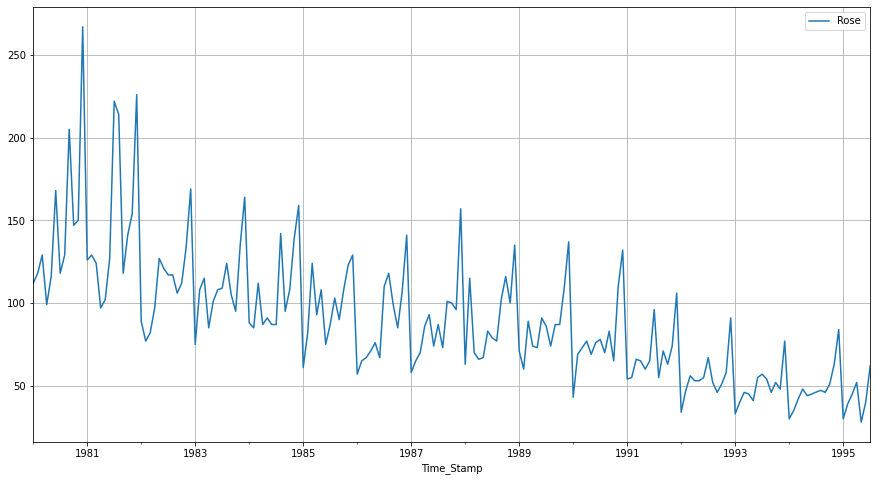

In [28]:
from pylab import rcParams
rcParams['figure.figsize'] = 15,8
df.plot();
plt.grid()

From the above figure we can see there is a downward trend and multiplicative seasonality

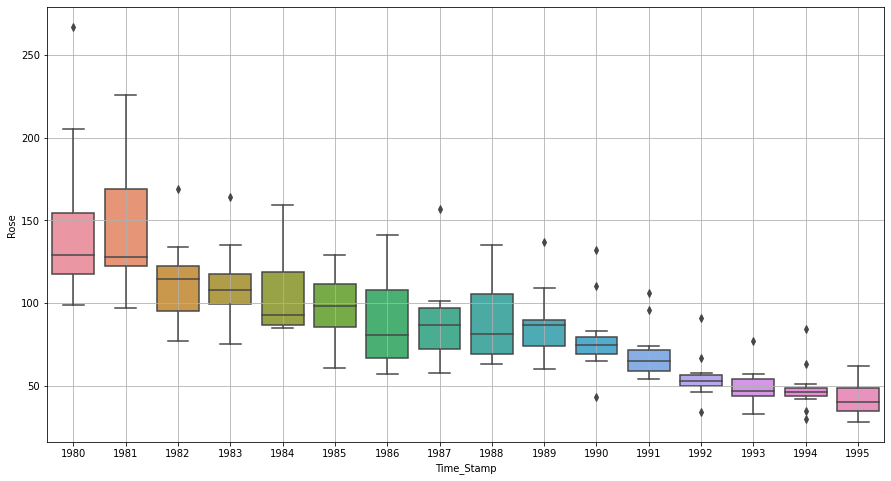

In [29]:
# Yearly Boxplot
sns.boxplot(x = df.index.year,y = df['Rose'])
plt.grid();

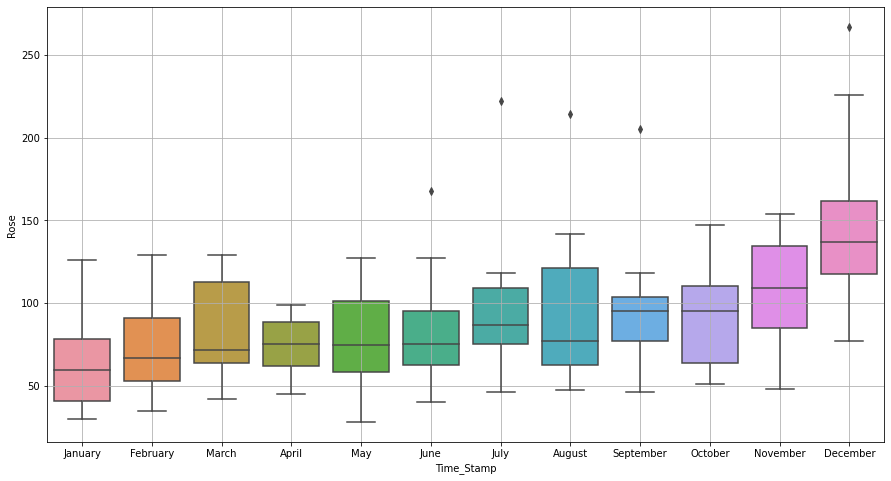

In [30]:
#Monthly Boxplot
sns.boxplot(x = df.index.month_name(),y = df['Rose'])
plt.grid();

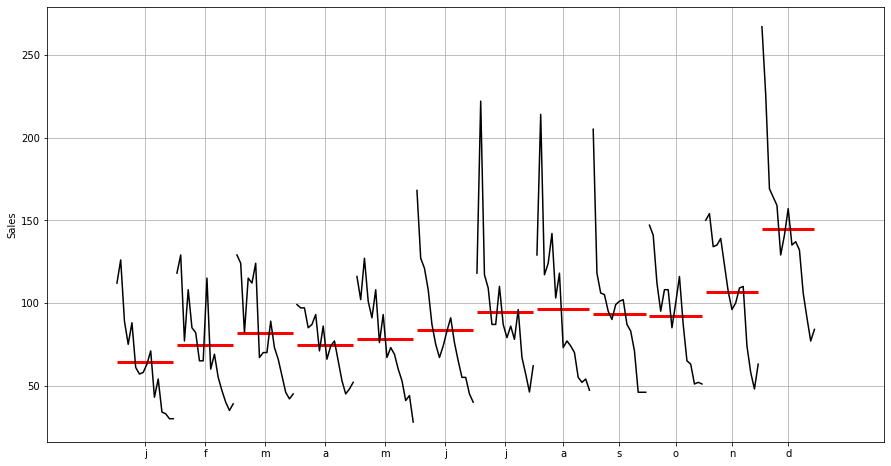

In [31]:
#Plot a time series monthplot to understand the spread of Sales across different years and within different months across years.

from statsmodels.graphics.tsaplots import month_plot

month_plot(df['Rose'],ylabel='Sales')
plt.grid();

In [32]:
# Plot a time series monthplot to understand the spread of Sales across different years and within different months across years.

monthly_sales_across_years = pd.pivot_table(df, values = 'Rose', columns = df.index.month, index = df.index.year)
monthly_sales_across_years


Time_Stamp     1      2      3     4      5      6           7           8   \
Time_Stamp                                                                    
1980        112.0  118.0  129.0  99.0  116.0  168.0  118.000000  129.000000   
1981        126.0  129.0  124.0  97.0  102.0  127.0  222.000000  214.000000   
1982         89.0   77.0   82.0  97.0  127.0  121.0  117.000000  117.000000   
1983         75.0  108.0  115.0  85.0  101.0  108.0  109.000000  124.000000   
1984         88.0   85.0  112.0  87.0   91.0   87.0   87.000000  142.000000   
1985         61.0   82.0  124.0  93.0  108.0   75.0   87.000000  103.000000   
1986         57.0   65.0   67.0  71.0   76.0   67.0  110.000000  118.000000   
1987         58.0   65.0   70.0  86.0   93.0   74.0   87.000000   73.000000   
1988         63.0  115.0   70.0  66.0   67.0   83.0   79.000000   77.000000   
1989         71.0   60.0   89.0  74.0   73.0   91.0   86.000000   74.000000   
1990         43.0   69.0   73.0  77.0   69.0   76.0   78.000000   70.000000   
1991         54.0   55.0   66.0  65.0   60.0   65.0   96.000000   55.000000   
1992         34.0   47.0   56.0  53.0   53.0   55.0   67.000000   52.000000   
1993         33.0   40.0   46.0  45.0   41.0   55.0   57.000000   54.000000   
1994         30.0   35.0   42.0  48.0   44.0   45.0   46.155493   47.221907   
1995         30.0   39.0   45.0  52.0   28.0   40.0   62.000000         NaN   

Time_Stamp     9      10     11     12  
Time_Stamp                              
1980        205.0  147.0  150.0  267.0  
1981        118.0  141.0  154.0  226.0  
1982        106.0  112.0  134.0  169.0  
1983        105.0   95.0  135.0  164.0  
1984         95.0  108.0  139.0  159.0  
1985         90.0  108.0  123.0  129.0  
1986         99.0   85.0  107.0  141.0  
1987        101.0  100.0   96.0  157.0  
1988        102.0  116.0  100.0  135.0  
1989         87.0   87.0  109.0  137.0  
1990         83.0   65.0  110.0  132.0  
1991         71.0   63.0   74.0  106.0  
1992         46.0   51.0   58.0   91.0  
1993         46.0   52.0   48.0   77.0  
1994         46.0   51.0   63.0   84.0  
1995          NaN    NaN    NaN    NaN

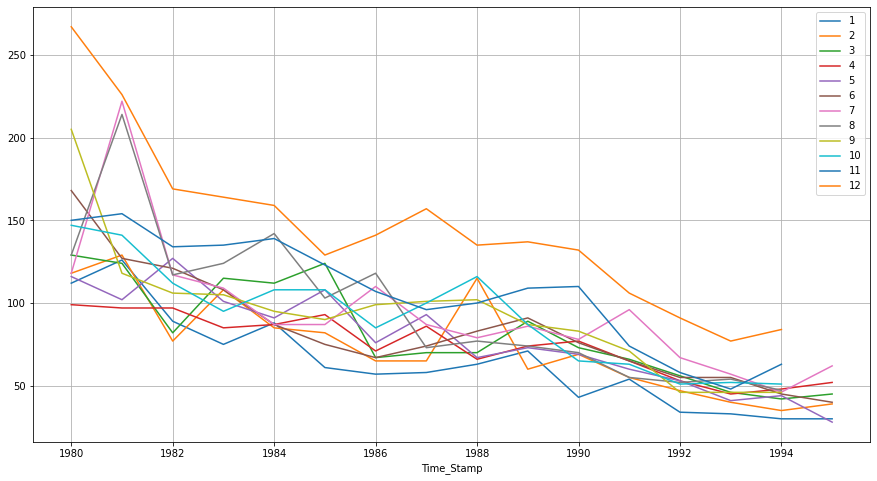

In [33]:
monthly_sales_across_years.plot()
plt.grid()
plt.legend(loc='best');

### Read this monthly data into a quarterly and yearly format. Compare the time series plot and draw inferences.

In [34]:
#yearly plot
df_yearly_sum = df.resample('A').sum()
df_yearly_sum.head()

Rose
Time_Stamp        
1980-12-31  1758.0
1981-12-31  1780.0
1982-12-31  1348.0
1983-12-31  1324.0
1984-12-31  1280.0

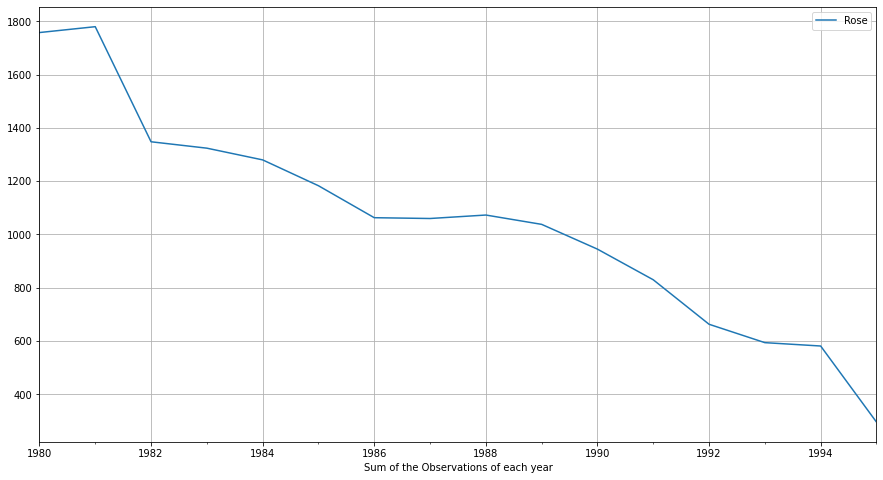

In [35]:
df_yearly_sum.plot();
plt.grid()
plt.xlabel('Sum of the Observations of each year');

In [36]:
df_yearly_mean = df.resample('Y').mean()
df_yearly_mean.head()

Rose
Time_Stamp            
1980-12-31  146.500000
1981-12-31  148.333333
1982-12-31  112.333333
1983-12-31  110.333333
1984-12-31  106.666667

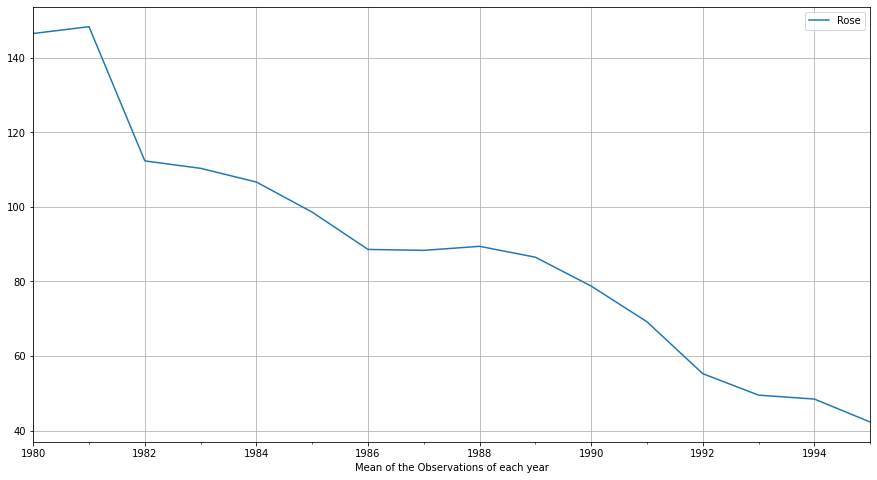

In [37]:
df_yearly_mean.plot();
plt.grid()
plt.xlabel('Mean of the Observations of each year');

In [38]:
#Quarterly plot
df_quarterly_sum = df.resample('Q').sum()
df_quarterly_sum.head()

Rose
Time_Stamp       
1980-03-31  359.0
1980-06-30  383.0
1980-09-30  452.0
1980-12-31  564.0
1981-03-31  379.0

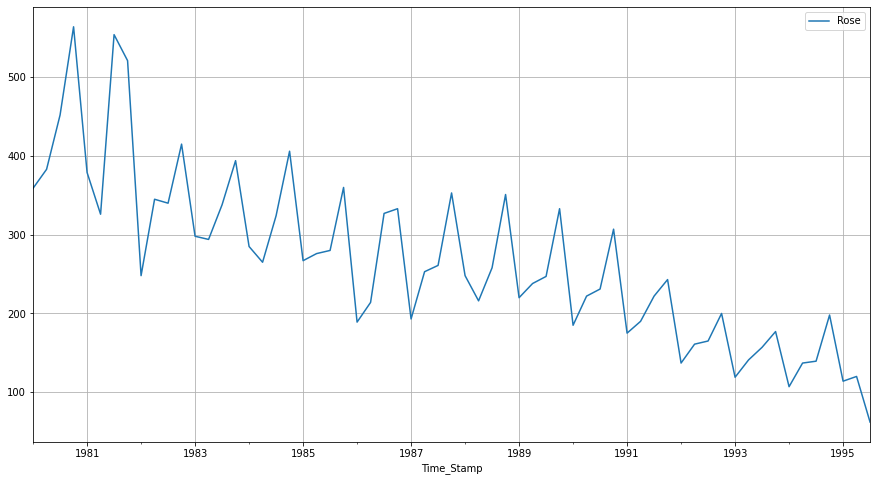

In [39]:
df_quarterly_sum.plot();
plt.grid()

In [40]:
df_quarterly_mean = df.resample('Q').mean()
df_quarterly_mean.head()

Rose
Time_Stamp            
1980-03-31  119.666667
1980-06-30  127.666667
1980-09-30  150.666667
1980-12-31  188.000000
1981-03-31  126.333333

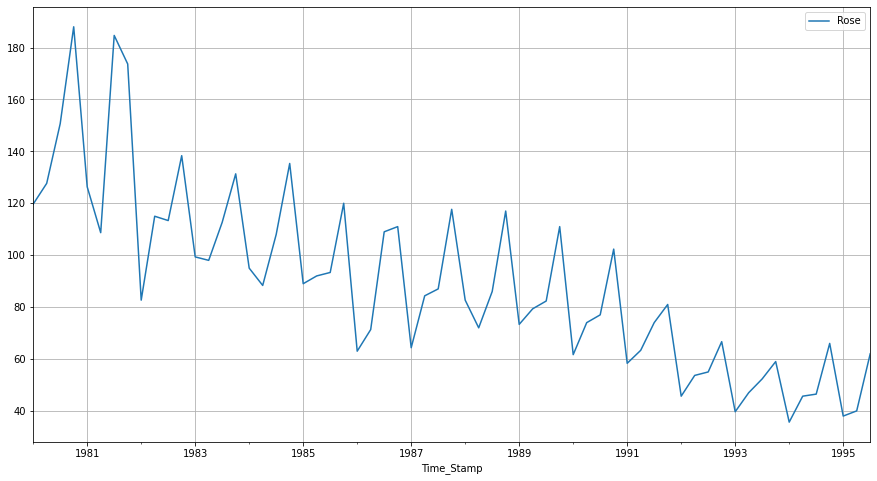

In [41]:
df_quarterly_mean.plot();
plt.grid()

In [42]:
#Daily plot
df_daily_sum = df.resample('D').sum()
df_daily_sum

Rose
Time_Stamp       
1980-01-31  112.0
1980-02-01    0.0
1980-02-02    0.0
1980-02-03    0.0
1980-02-04    0.0
...           ...
1995-07-27    0.0
1995-07-28    0.0
1995-07-29    0.0
1995-07-30    0.0
1995-07-31   62.0

[5661 rows x 1 columns]

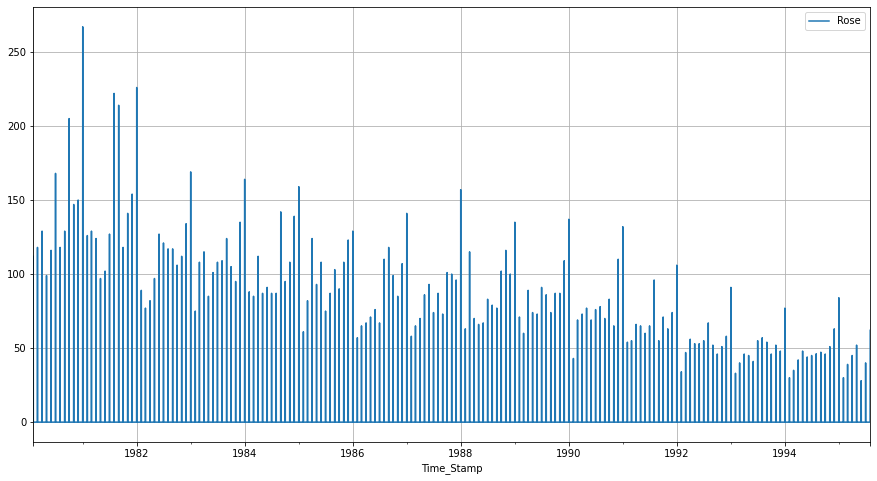

In [43]:
df_daily_sum.plot()
plt.grid();

In [44]:
#Decade plot
df_decade_sum = df.resample('10Y').sum()
df_decade_sum

Rose
Time_Stamp            
1980-12-31   1758.0000
1990-12-31  12094.0000
2000-12-31   2964.3774

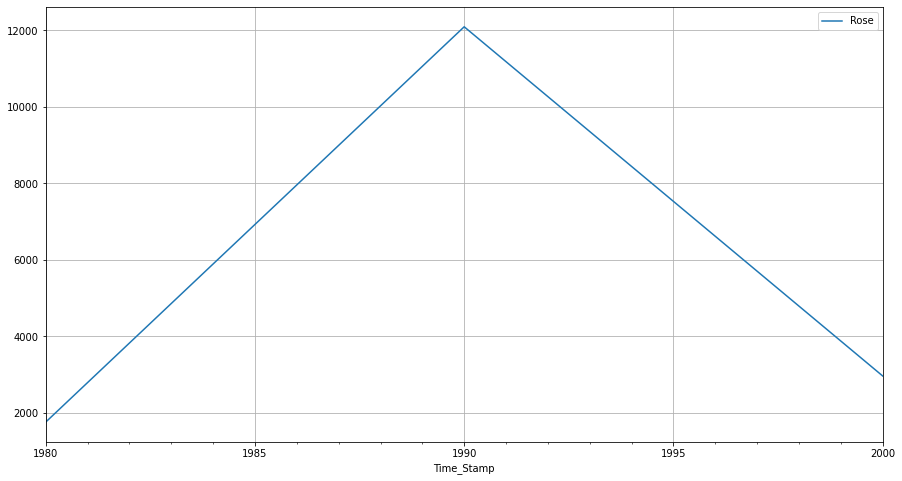

In [45]:
df_decade_sum.plot();
plt.grid()

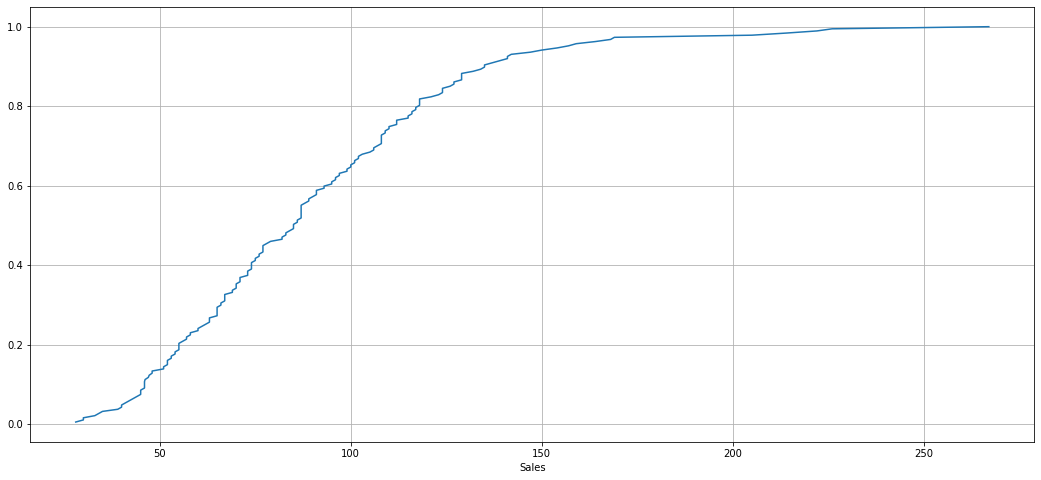

In [46]:
#Empirical Cummulative Distribution Curve

from statsmodels.distributions.empirical_distribution import ECDF

plt.figure(figsize = (18, 8))
cdf = ECDF(df['Rose'])
plt.plot(cdf.x, cdf.y, label = "statmodels");
plt.grid()
plt.xlabel('Sales');

In [47]:
df.min()

Rose    28.0
dtype: float64

In [48]:
df.max()

Rose    267.0
dtype: float64

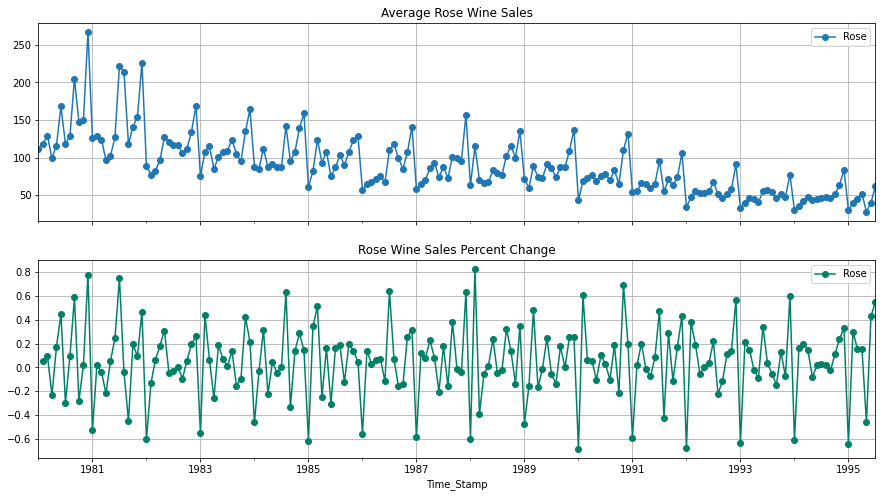

In [49]:
# Plot the average RetailSales per month and the month on month percentage change of RetailSales
# group by date and get average Sales, and precent change

avg    = df.groupby(df.index)["Rose"].mean()
pct_change = df.groupby(df.index)["Rose"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average Sales over time(year-month)
ax1 = avg.plot(legend=True,ax=axis1,marker='o',title="Average Rose Wine Sales",grid=True)
ax1.set_xticks(range(len(avg)))
ax1.set_xticklabels(avg.index.tolist())
# plot precent change for RetailSales over time(year-month)
ax2 = pct_change.plot(legend=True,ax=axis2,marker='o',colormap="summer",title="Rose Wine Sales Percent Change",grid=True)

### Decomposing The Time Series

#### Additive Model

In [50]:
from statsmodels.tsa.seasonal import seasonal_decompose

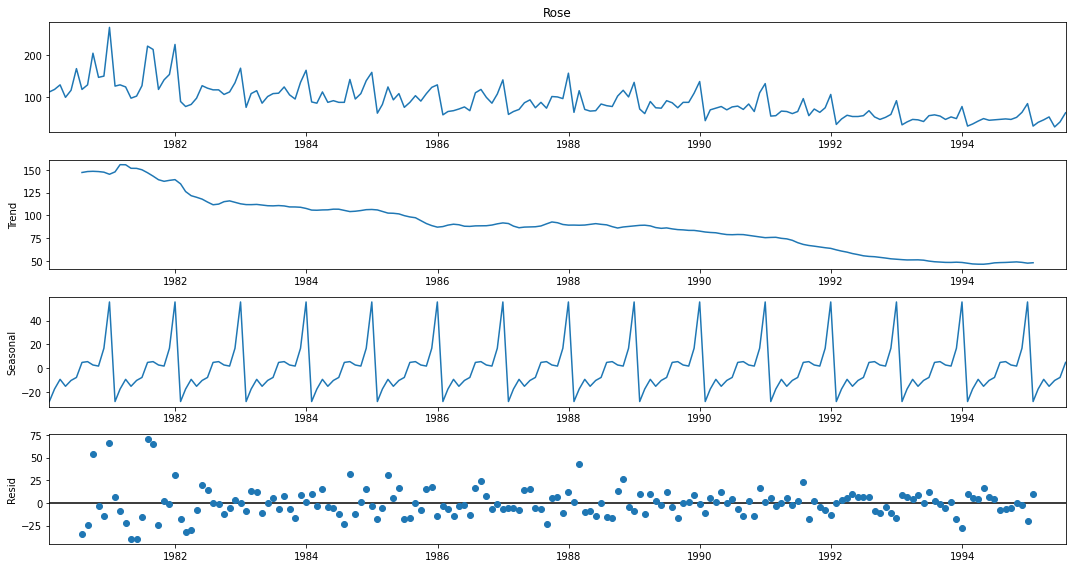

In [51]:
decomposition = seasonal_decompose(df['Rose'],model='additive')
decomposition.plot();

#### Multiplicative Model

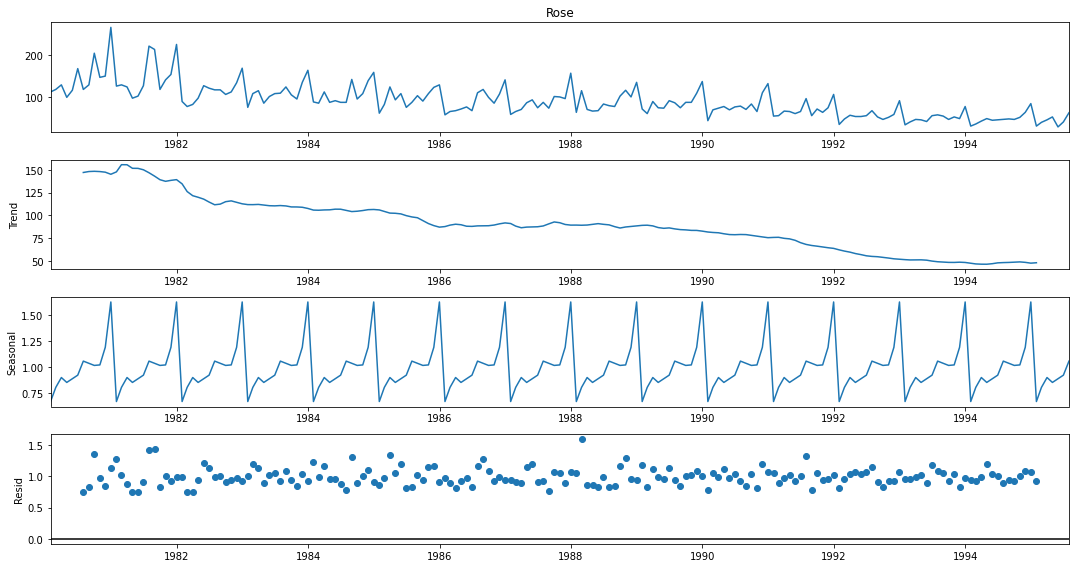

In [52]:
decomposition = seasonal_decompose(df['Rose'],model='multiplicative')
decomposition.plot();

In [53]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Time_Stamp
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31    147.083333
1980-08-31    148.125000
1980-09-30    148.375000
1980-10-31    148.083333
1980-11-30    147.416667
1980-12-31    145.125000
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31    0.669945
1980-02-29    0.806018
1980-03-31    0.900897
1980-04-30    0.853717
1980-05-31    0.889141
1980-06-30    0.923716
1980-07-31    1.058922
1980-08-31    1.037766
1980-09-30    1.017401
1980-10-31    1.022301
1980-11-30    1.192005
1980-12-31    1.628171
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
1980-01-31         NaN
1980-02-29         NaN
1980-03-31         NaN
1980-04-30         NaN
1980-05-31         NaN
1980-06-30         NaN
1980-07-31    0.757626
1980-08-31    0.839193
1980-09-30    1.358004
1980-10-31    0.971029
1980-11-30    0.853624
1980-12-31    1.129976
Name: resid, dtype:

## 3.Split the data into training and test. The test data should start in 1991.

In [54]:
Train= df[df.index.year < 1991]
Test= df[df.index.year >= 1991]

In [55]:
print(Train.shape)
print(Test.shape)

(132, 1)
(55, 1)


In [56]:
Test.head()

Rose
Time_Stamp      
1991-01-31  54.0
1991-02-28  55.0
1991-03-31  66.0
1991-04-30  65.0
1991-05-31  60.0

In [57]:
print('First few rows of Training Data','\n',Train.head(),'\n')
print('Last few rows of Training Data','\n',Train.tail(),'\n')
print('First few rows of Test Data','\n',Test.head(),'\n')
print('Last few rows of Test Data','\n',Test.tail(),'\n')

First few rows of Training Data 
              Rose
Time_Stamp       
1980-01-31  112.0
1980-02-29  118.0
1980-03-31  129.0
1980-04-30   99.0
1980-05-31  116.0 

Last few rows of Training Data 
              Rose
Time_Stamp       
1990-08-31   70.0
1990-09-30   83.0
1990-10-31   65.0
1990-11-30  110.0
1990-12-31  132.0 

First few rows of Test Data 
             Rose
Time_Stamp      
1991-01-31  54.0
1991-02-28  55.0
1991-03-31  66.0
1991-04-30  65.0
1991-05-31  60.0 

Last few rows of Test Data 
             Rose
Time_Stamp      
1995-03-31  45.0
1995-04-30  52.0
1995-05-31  28.0
1995-06-30  40.0
1995-07-31  62.0 



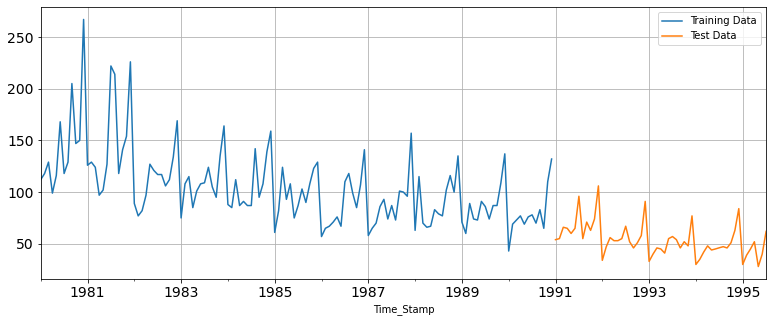

In [58]:
Train['Rose'].plot(figsize=(13,5), fontsize=14)
Test['Rose'].plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

## 4.Build all the exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other additional models such as regression, naïve forecast models, simple average models, moving average models should also be built on the training data and check the performance on the test data using RMSE.

#### Building different models and comparing the accuracy metrics

For Linear regression the equation will be y=a+b(time)

For this particular linear regression, we are going to regress the 'Sales' variable against the order of the occurrence. For this we need to modify our training data before fitting it into a linear regression.

#### Model 1: Linear Regression

In [59]:
train_time = [i+1 for i in range(len(Train))]
test_time = [i+43 for i in range(len(Test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97]


We see that we have successfully generated the numerical time instance order for both the training and test data. Now we will add these values in the training and test data.

In [60]:
LinearRegression_train = Train.copy()
LinearRegression_test = Test.copy()

In [61]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
              Rose  time
Time_Stamp             
1980-01-31  112.0     1
1980-02-29  118.0     2
1980-03-31  129.0     3
1980-04-30   99.0     4
1980-05-31  116.0     5 

Last few rows of Training Data 
              Rose  time
Time_Stamp             
1990-08-31   70.0   128
1990-09-30   83.0   129
1990-10-31   65.0   130
1990-11-30  110.0   131
1990-12-31  132.0   132 

First few rows of Test Data 
             Rose  time
Time_Stamp            
1991-01-31  54.0    43
1991-02-28  55.0    44
1991-03-31  66.0    45
1991-04-30  65.0    46
1991-05-31  60.0    47 

Last few rows of Test Data 
             Rose  time
Time_Stamp            
1995-03-31  45.0    93
1995-04-30  52.0    94
1995-05-31  28.0    95
1995-06-30  40.0    96
1995-07-31  62.0    97 



In [62]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Rose'].values)

LinearRegression()

In [63]:
#predictions on train data
train_predictions_model = lr.predict(LinearRegression_train[['time']])
LinearRegression_train['RegOnTime'] = train_predictions_model

#predictions on test data
test_predictions_model = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model

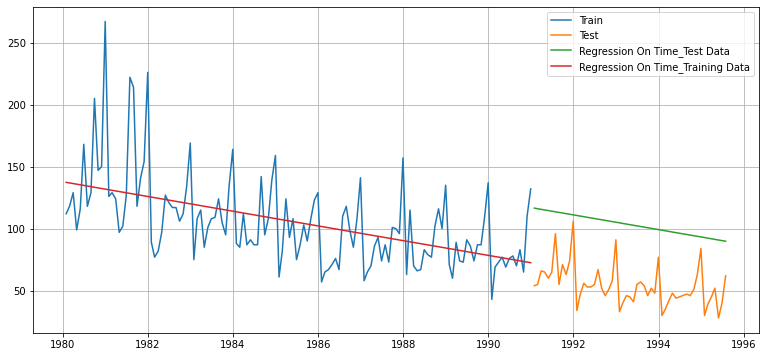

In [64]:
plt.figure(figsize=(13,6))
plt.plot( Train['Rose'], label='Train')
plt.plot(Test['Rose'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.plot(LinearRegression_train['RegOnTime'], label='Regression On Time_Training Data')
plt.legend(loc='best')
plt.grid();

**Performing metrics and model evaluation**

In [65]:
from sklearn import metrics

In [66]:
## Training Data - RMSE

rmse_model_train = metrics.mean_squared_error(Train['Rose'],train_predictions_model,squared=False)
print("Regression On Time forecast on the Training Data: RMSE is %3.3f " %(rmse_model_train))

Regression On Time forecast on the Training Data: RMSE is 30.718 


In [67]:
## Test Data - RMSE 

rmse_model_test = metrics.mean_squared_error(Test['Rose'],test_predictions_model,squared=False)
print("Regression On Time forecast on the Test Data: RMSE is %3.3f" %(rmse_model_test))

Regression On Time forecast on the Test Data: RMSE is 51.392


In [68]:
Results_df = pd.DataFrame({'Test RMSE': [rmse_model_test]},index=['RegressionOnTime'])
Results_df

Test RMSE
RegressionOnTime   51.39189

#### Model 2: Naive Approach

In [69]:
NaiveModel_train = Train.copy()
NaiveModel_test = Test.copy()

In [70]:
NaiveModel_train['naive'] = np.asarray(Train['Rose'])[len(np.asarray(Train['Rose']))-1]
NaiveModel_train['naive'].head()

Time_Stamp
1980-01-31    132.0
1980-02-29    132.0
1980-03-31    132.0
1980-04-30    132.0
1980-05-31    132.0
Name: naive, dtype: float64

In [71]:
NaiveModel_test['naive'] = np.asarray(Train['Rose'])[len(np.asarray(Train['Rose']))-1]
NaiveModel_test['naive'].head()

Time_Stamp
1991-01-31    132.0
1991-02-28    132.0
1991-03-31    132.0
1991-04-30    132.0
1991-05-31    132.0
Name: naive, dtype: float64

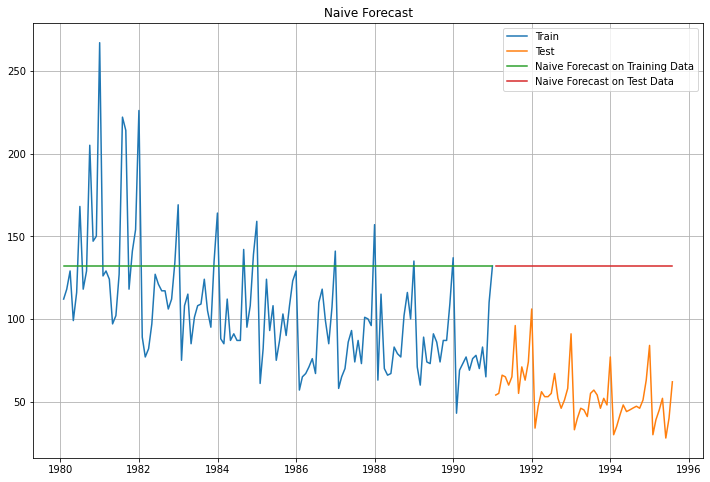

In [72]:
plt.figure(figsize=(12,8))
plt.plot(NaiveModel_train['Rose'], label='Train')
plt.plot(Test['Rose'], label='Test')
plt.plot(NaiveModel_train['naive'], label='Naive Forecast on Training Data')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

**Performing metrics and model evaluation**

In [73]:
## Training Data - RMSE 

rmse_model_train = metrics.mean_squared_error(Train['Rose'],NaiveModel_train['naive'],squared=False)
print("Naive Model forecast on the Training Data: RMSE is %3.3f" %(rmse_model_train))

Naive Model forecast on the Training Data: RMSE is 45.064


In [74]:
## Test Data - RMSE 

rmse_model_test = metrics.mean_squared_error(Test['Rose'],NaiveModel_test['naive'],squared=False)
print("Naive Model forecast on the Test Data: RMSE is %3.3f" %(rmse_model_test))

Naive Model forecast on the Test Data: RMSE is 79.672


In [75]:
results_df1 = pd.DataFrame({'Test RMSE': [rmse_model_test]},index=['NaiveModel'])

Results_df = pd.concat([Results_df, results_df1])
Results_df

Test RMSE
RegressionOnTime  51.391890
NaiveModel        79.672238

#### Method 3: Simple Average Model

For this particular simple average method, 
we will forecast by using the average of the training values.

In [76]:
SimpleAverage_train = Train.copy()
SimpleAverage_test = Test.copy()

In [77]:
SimpleAverage_train['mean_forecast'] = Train['Rose'].mean()
SimpleAverage_train.head()

Rose  mean_forecast
Time_Stamp                      
1980-01-31  112.0     104.939394
1980-02-29  118.0     104.939394
1980-03-31  129.0     104.939394
1980-04-30   99.0     104.939394
1980-05-31  116.0     104.939394

In [78]:
SimpleAverage_test['mean_forecast'] = Train['Rose'].mean()
SimpleAverage_test.head()

Rose  mean_forecast
Time_Stamp                     
1991-01-31  54.0     104.939394
1991-02-28  55.0     104.939394
1991-03-31  66.0     104.939394
1991-04-30  65.0     104.939394
1991-05-31  60.0     104.939394

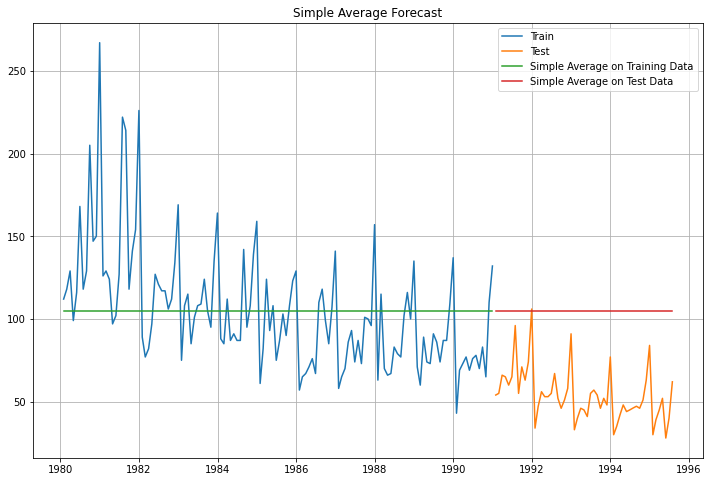

In [79]:
plt.figure(figsize=(12,8))
plt.plot(SimpleAverage_train['Rose'], label='Train')
plt.plot(SimpleAverage_test['Rose'], label='Test')
plt.plot(SimpleAverage_train['mean_forecast'], label='Simple Average on Training Data')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

**performing metrics and model evaluation**

In [80]:
## Training Data - RMSE

rmse_model_train = metrics.mean_squared_error(Train['Rose'],SimpleAverage_train['mean_forecast'],squared=False)
print("Simple Average Model forecast on the Training Data: RMSE is %3.3f " %(rmse_model_train))

Simple Average Model forecast on the Training Data: RMSE is 36.034 


In [81]:
## Test Data - RMSE 

rmse_model_test = metrics.mean_squared_error(Test['Rose'],SimpleAverage_test['mean_forecast'],squared=False)
print("Simple Average forecast on the Test Data: RMSE is %3.3f" %(rmse_model_test))

Simple Average forecast on the Test Data: RMSE is 53.413


In [82]:
results_df2 = pd.DataFrame({'Test RMSE': [rmse_model_test]}
                           ,index=['SimpleAverageModel'])

Results_df = pd.concat([Results_df, results_df2])
Results_df

Test RMSE
RegressionOnTime    51.391890
NaiveModel          79.672238
SimpleAverageModel  53.413057

#### Method 4: Moving Average(MA)

In [83]:
MovingAverage = df.copy()
MovingAverage.head()

Rose
Time_Stamp       
1980-01-31  112.0
1980-02-29  118.0
1980-03-31  129.0
1980-04-30   99.0
1980-05-31  116.0

In [84]:
MovingAverage['Trailing_2'] = MovingAverage['Rose'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Rose'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Rose'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Rose'].rolling(9).mean()

MovingAverage.head()

Rose  Trailing_2  Trailing_4  Trailing_6  Trailing_9
Time_Stamp                                                       
1980-01-31  112.0         NaN         NaN         NaN         NaN
1980-02-29  118.0       115.0         NaN         NaN         NaN
1980-03-31  129.0       123.5         NaN         NaN         NaN
1980-04-30   99.0       114.0       114.5         NaN         NaN
1980-05-31  116.0       107.5       115.5         NaN         NaN

In [85]:
#While performing rolling windows we will get NaN values , so we have to be careful.

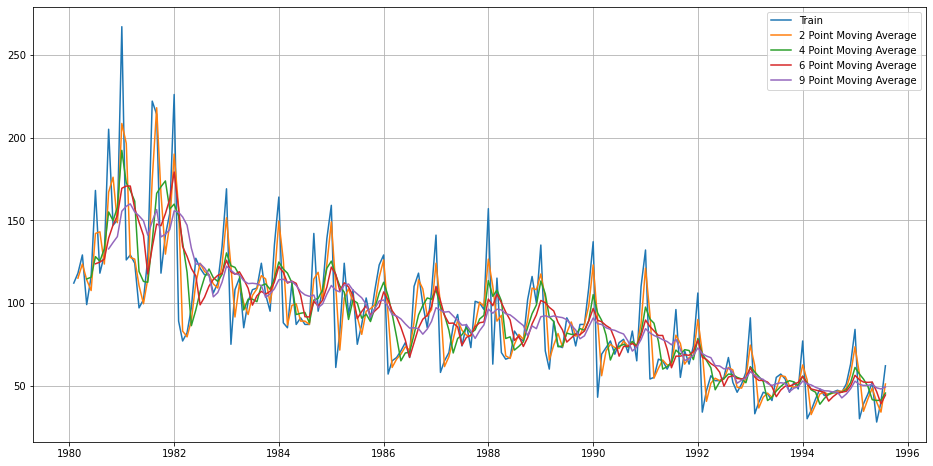

In [86]:
## Plotting on the whole data

plt.figure(figsize=(16,8))
plt.plot(MovingAverage['Rose'], label='Train')
plt.plot(MovingAverage['Trailing_2'],label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'],label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label='6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label='9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

In [87]:
#Creating train and test set 
trailing_MovingAverage_train=MovingAverage[0:int(len(MovingAverage)*0.71)] 
trailing_MovingAverage_test=MovingAverage[int(len(MovingAverage)*0.71):]

In [88]:
trailing_MovingAverage_train.tail()

Rose  Trailing_2  Trailing_4  Trailing_6  Trailing_9
Time_Stamp                                                       
1990-08-31   70.0        74.0       73.25   73.833333   76.888889
1990-09-30   83.0        76.5       76.75   75.500000   70.888889
1990-10-31   65.0        74.0       74.00   73.500000   73.333333
1990-11-30  110.0        87.5       82.00   80.333333   77.888889
1990-12-31  132.0       121.0       97.50   89.666667   84.444444

In [89]:
trailing_MovingAverage_test.head()

Rose  Trailing_2  Trailing_4  Trailing_6  Trailing_9
Time_Stamp                                                      
1991-01-31  54.0        93.0       90.25   85.666667   81.888889
1991-02-28  55.0        54.5       87.75   83.166667   80.333333
1991-03-31  66.0        60.5       76.75   80.333333   79.222222
1991-04-30  65.0        65.5       60.00   80.333333   77.777778
1991-05-31  60.0        62.5       61.50   72.000000   76.666667

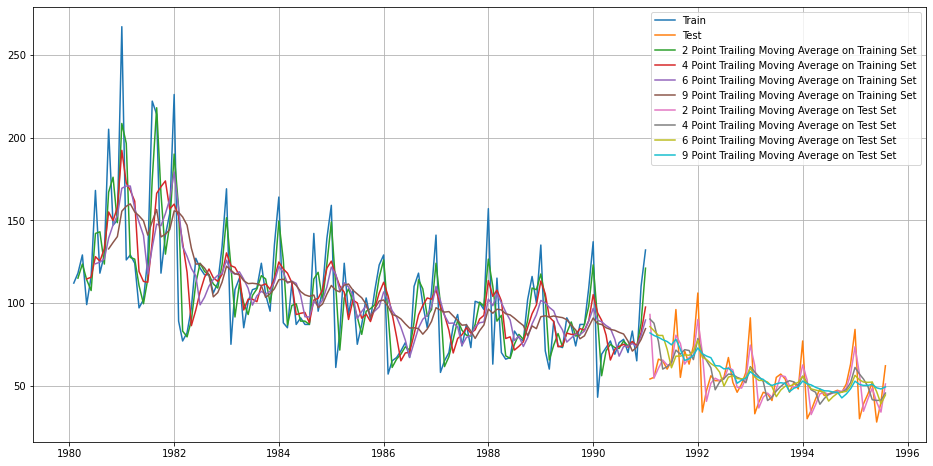

In [90]:
plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Rose'], label='Train')
plt.plot(trailing_MovingAverage_test['Rose'], label='Test')

plt.plot(trailing_MovingAverage_train['Trailing_2'],label ='2 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_4'],label ='4 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_6'],label ='6 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_9'],label ='9 Point Trailing Moving Average on Training Set')

plt.plot(trailing_MovingAverage_test['Trailing_2'],label ='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'],label ='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label ='6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label ='9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.grid();

In [91]:
## Test Data - RMSE --> 2 point Trailing MA

rmse_model_test_2 = metrics.mean_squared_error(Test['Rose'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("2 point Moving Average Model forecast on the Testing Data: RMSE is %3.3f" %(rmse_model_test_2))

## Test Data - RMSE  --> 4 point Trailing MA

rmse_model_test_4 = metrics.mean_squared_error(Test['Rose'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("4 point Moving Average Model forecast on the Testing Data: RMSE is %3.3f" %(rmse_model_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model_test_6 = metrics.mean_squared_error(Test['Rose'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("6 point Moving Average Model forecast on the Testing Data: RMSE is %3.3f" %(rmse_model_test_6))

## Test Data - RMSE --> 9 point Trailing MA

rmse_model_test_9 = metrics.mean_squared_error(Test['Rose'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("9 point Moving Average Model forecast on the Testing Data: RMSE is %3.3f" %(rmse_model_test_9))

2 point Moving Average Model forecast on the Testing Data: RMSE is 11.530
4 point Moving Average Model forecast on the Testing Data: RMSE is 14.444
6 point Moving Average Model forecast on the Testing Data: RMSE is 14.555
9 point Moving Average Model forecast on the Testing Data: RMSE is 14.721


**performing metrics and model evaluation (for the test data)**

In [92]:
results_df3 = pd.DataFrame({'Test RMSE': [rmse_model_test_2,rmse_model_test_4
                                          ,rmse_model_test_6,rmse_model_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

Results_df = pd.concat([Results_df, results_df3])
Results_df

Test RMSE
RegressionOnTime             51.391890
NaiveModel                   79.672238
SimpleAverageModel           53.413057
2pointTrailingMovingAverage  11.529994
4pointTrailingMovingAverage  14.444342
6pointTrailingMovingAverage  14.554944
9pointTrailingMovingAverage  14.721499

In [93]:
#Before we go on to build the various Exponential Smoothing models,
#let us plot all the models and compare the Time Series plots.

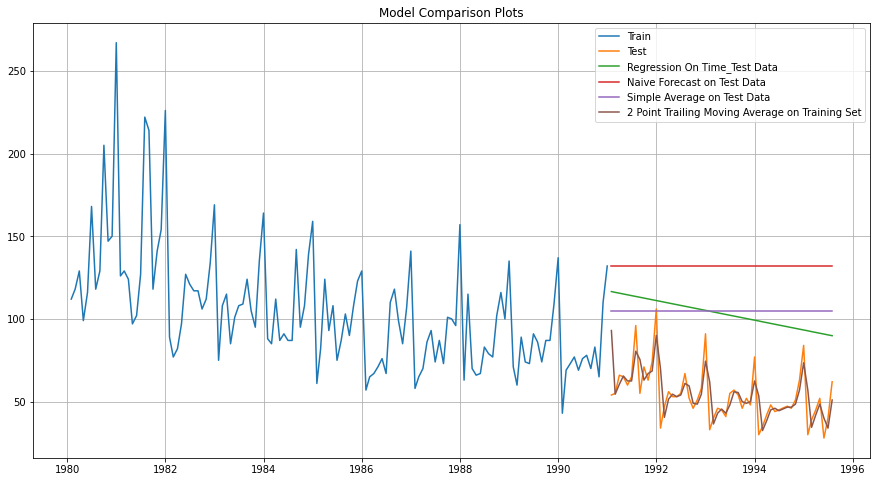

In [94]:
## Plotting on both Training and Test data

#plt.figure(figsize=(30,12))
plt.plot(Train['Rose'], label='Train')
plt.plot(Test['Rose'], label='Test')

plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')


plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

#### Method 5: Simple Exponential Smoothing

In [95]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [96]:
SES_train = Train.copy()
SES_test = Test.copy()

In [97]:
import warnings
warnings.filterwarnings('ignore')

In [98]:
model_SES = SimpleExpSmoothing(SES_train['Rose'])

In [99]:
model_SES_autofit = model_SES.fit(optimized=True,use_brute=True)

In [100]:
model_SES_autofit.params

{'smoothing_level': 0.09874995336438987,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 134.38681121931316,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [101]:
print(model_SES_autofit.summary())

                       SimpleExpSmoothing Model Results                       
Dep. Variable:                   Rose   No. Observations:                  132
Model:             SimpleExpSmoothing   SSE                         130984.223
Optimized:                       True   AIC                            914.804
Trend:                           None   BIC                            920.570
Seasonal:                        None   AICC                           915.119
Seasonal Periods:                None   Date:                 Wed, 23 Feb 2022
Box-Cox:                        False   Time:                         20:48:00
Box-Cox Coeff.:                  None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.0987500                alpha                 True
initial_level              134.38681                

In [102]:
SES_train['predict'] = model_SES_autofit.fittedvalues
SES_train.head()

Rose     predict
Time_Stamp                   
1980-01-31  112.0  134.386811
1980-02-29  118.0  132.176115
1980-03-31  129.0  130.776224
1980-04-30   99.0  130.600822
1980-05-31  116.0  127.480242

In [103]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(SES_test))
SES_test.head()

Rose    predict
Time_Stamp                 
1991-01-31  54.0  87.105001
1991-02-28  55.0  87.105001
1991-03-31  66.0  87.105001
1991-04-30  65.0  87.105001
1991-05-31  60.0  87.105001

Text(0.5, 1.0, 'Alpha =0 Predictions')

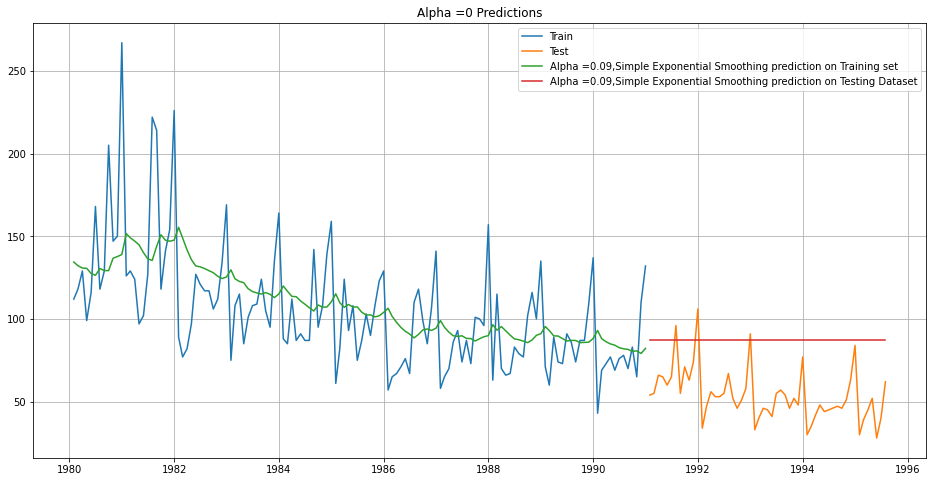

In [104]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(SES_train['Rose'], label='Train')
plt.plot(SES_test['Rose'], label='Test')

plt.plot(SES_train['predict'], label='Alpha =0.09,Simple Exponential Smoothing prediction on Training set')
plt.plot(SES_test['predict'], label='Alpha =0.09,Simple Exponential Smoothing prediction on Testing Dataset')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0 Predictions')

In [105]:
## Training Data --RMSE

rmse_model_train = metrics.mean_squared_error(SES_train['Rose'],SES_train['predict'],squared=False)
print("Alpha =0 Simple Exponential Smoothing Model forecast on the Training Data: RMSE is %3.3f" %(rmse_model_train))

Alpha =0 Simple Exponential Smoothing Model forecast on the Training Data: RMSE is 31.501


In [106]:
## Test Data --RMSE

rmse_model_test = metrics.mean_squared_error(SES_test['Rose'],SES_test['predict'],squared=False)
print("Alpha =0 Simple Exponential Smoothing Model forecast on the Training Data: RMSE is %3.3f" %(rmse_model_test))


Alpha =0 Simple Exponential Smoothing Model forecast on the Training Data: RMSE is 36.748


In [107]:
results_df4 = pd.DataFrame({'Test RMSE': [rmse_model_test]}
                           ,index=['Alpha=0.09,SimpleExponentialSmoothing'])

Results_df = pd.concat([Results_df, results_df4])
Results_df

Test RMSE
RegressionOnTime                       51.391890
NaiveModel                             79.672238
SimpleAverageModel                     53.413057
2pointTrailingMovingAverage            11.529994
4pointTrailingMovingAverage            14.444342
6pointTrailingMovingAverage            14.554944
9pointTrailingMovingAverage            14.721499
Alpha=0.09,SimpleExponentialSmoothing  36.748163

In [108]:
#Setting different alpha values.

The higher the alpha value more weightage is given to the more recent observation. That means, what happened recently will happen again.

#### Model6:Simple Exponential Model with alpha in range of 0.01 to 0.1

In [109]:
## First we will define an empty dataframe to store our values from the loop
resultsDf_model = pd.DataFrame({'Alpha Values':[],'Test RMSE': []})
resultsDf_model

Empty DataFrame
Columns: [Alpha Values, Test RMSE]
Index: []

In [110]:
for i in np.arange(0.1,1,0.01):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=True,use_brute=True)
    SES_train['predict',i] = model_SES_alpha_i.fittedvalues
    SES_test['predict',i] = model_SES_alpha_i.forecast(steps=len(SES_test))
    
    rmse_model_train_i = metrics.mean_squared_error(SES_train['Rose'],SES_train['predict',i],squared=False)
    
    rmse_model_test_i = metrics.mean_squared_error(SES_test['Rose'],SES_test['predict',i],squared=False)
    
    
    resultsDf_model = resultsDf_model.append({'Alpha Values':i,'Train RMSE':rmse_model_train_i 
                                      ,'Test RMSE':rmse_model_test_i}, ignore_index=True)

In [111]:
resultsDf_model

Alpha Values  Test RMSE  Train RMSE
0           0.10  36.779971   31.501015
1           0.11  37.068342   31.511359
2           0.12  37.409386   31.534401
3           0.13  37.794738   31.566390
4           0.14  38.218014   31.604773
..           ...        ...         ...
85          0.95  78.486124   38.112725
86          0.96  78.740320   38.243537
87          0.97  78.986129   38.376017
88          0.98  79.223454   38.510197
89          0.99  79.452192   38.646108

[90 rows x 3 columns]

In [112]:
resultsDf_model.sort_values(by=['Test RMSE'], ascending=True)

Alpha Values  Test RMSE  Train RMSE
0           0.10  36.779971   31.501015
1           0.11  37.068342   31.511359
2           0.12  37.409386   31.534401
3           0.13  37.794738   31.566390
4           0.14  38.218014   31.604773
..           ...        ...         ...
85          0.95  78.486124   38.112725
86          0.96  78.740320   38.243537
87          0.97  78.986129   38.376017
88          0.98  79.223454   38.510197
89          0.99  79.452192   38.646108

[90 rows x 3 columns]

In [113]:
model_SES_s = SimpleExpSmoothing(SES_train['Rose'])
model_SES_s_autofit = model_SES.fit(smoothing_level=0.10,optimized=True,use_brute=True)

In [114]:
print(model_SES_autofit.summary())

                       SimpleExpSmoothing Model Results                       
Dep. Variable:                   Rose   No. Observations:                  132
Model:             SimpleExpSmoothing   SSE                         130984.223
Optimized:                       True   AIC                            914.804
Trend:                           None   BIC                            920.570
Seasonal:                        None   AICC                           915.119
Seasonal Periods:                None   Date:                 Wed, 23 Feb 2022
Box-Cox:                        False   Time:                         20:48:04
Box-Cox Coeff.:                  None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.0987500                alpha                 True
initial_level              134.38681                

In [115]:
model_SES_autofit.params

{'smoothing_level': 0.09874995336438987,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 134.38681121931316,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

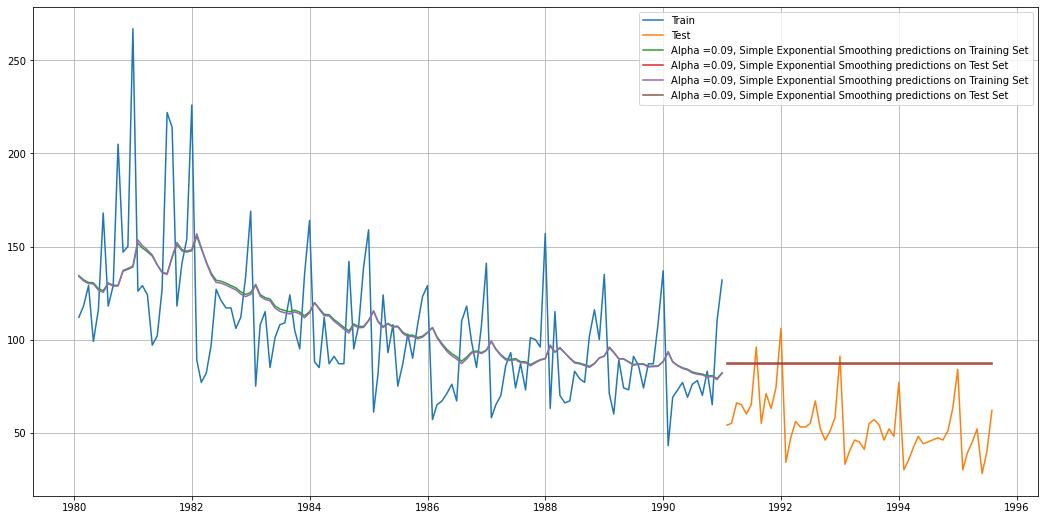

In [116]:
## Plotting on both the Training and Test data for top values of alpha

plt.figure(figsize=(18,9))
plt.plot(SES_train['Rose'], label='Train')
plt.plot(SES_test['Rose'], label='Test')

plt.plot(SES_train['predict',0.10], label='Alpha =0.09, Simple Exponential Smoothing predictions on Training Set')
plt.plot(SES_test['predict',0.10], label='Alpha =0.09, Simple Exponential Smoothing predictions on Test Set')

plt.plot(SES_train['predict',0.11], label='Alpha =0.09, Simple Exponential Smoothing predictions on Training Set')
plt.plot(SES_test['predict',0.11], label='Alpha =0.09, Simple Exponential Smoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [117]:
results_df5 = pd.DataFrame({'Test RMSE': [resultsDf_model['Test RMSE'][0]]}
                           ,index=['Alpha=0.09,SimpleExponentialSmoothing'])

Results_df = pd.concat([Results_df, results_df5])
Results_df

Test RMSE
RegressionOnTime                       51.391890
NaiveModel                             79.672238
SimpleAverageModel                     53.413057
2pointTrailingMovingAverage            11.529994
4pointTrailingMovingAverage            14.444342
6pointTrailingMovingAverage            14.554944
9pointTrailingMovingAverage            14.721499
Alpha=0.09,SimpleExponentialSmoothing  36.748163
Alpha=0.09,SimpleExponentialSmoothing  36.779971

#### Model7:Double Exponential Smoothing (automated)

In [118]:
DES_train = Train.copy()
DES_test = Test.copy()

In [119]:
model_DES= Holt(DES_train['Rose'])

In [120]:
model_DES_autofit = model_DES.fit(optimized=True,use_brute=True)

In [121]:
model_DES_autofit.params_formatted

name       param  optimized
smoothing_level  alpha    0.129813       True
smoothing_trend   beta    0.053762       True
initial_level      l.0  145.730706       True
initial_trend      b.0   -0.100696       True

In [122]:
print(model_DES_autofit.summary())

                              Holt Model Results                              
Dep. Variable:                   Rose   No. Observations:                  132
Model:                           Holt   SSE                         134515.190
Optimized:                       True   AIC                            922.315
Trend:                       Additive   BIC                            933.846
Seasonal:                        None   AICC                           922.987
Seasonal Periods:                None   Date:                 Wed, 23 Feb 2022
Box-Cox:                        False   Time:                         20:48:05
Box-Cox Coeff.:                  None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.1298126                alpha                 True
smoothing_trend            0.0537622                

In [123]:
# predictions on training data
DES_train['predict',0.129,0.053] = model_DES_autofit.fittedvalues
DES_train.head()

Rose  (predict, 0.129, 0.053)
Time_Stamp                                
1980-01-31  112.0               145.630010
1980-02-29  118.0               140.929011
1980-03-31  129.0               137.457114
1980-04-30   99.0               135.804830
1980-05-31  116.0               130.215794

In [124]:
DES_test['predict',0.129,0.053] = model_DES_autofit.forecast(steps=len(DES_test))
DES_test.head()

Rose  (predict, 0.129, 0.053)
Time_Stamp                               
1991-01-31  54.0                86.161875
1991-02-28  55.0                86.247204
1991-03-31  66.0                86.332532
1991-04-30  65.0                86.417860
1991-05-31  60.0                86.503188

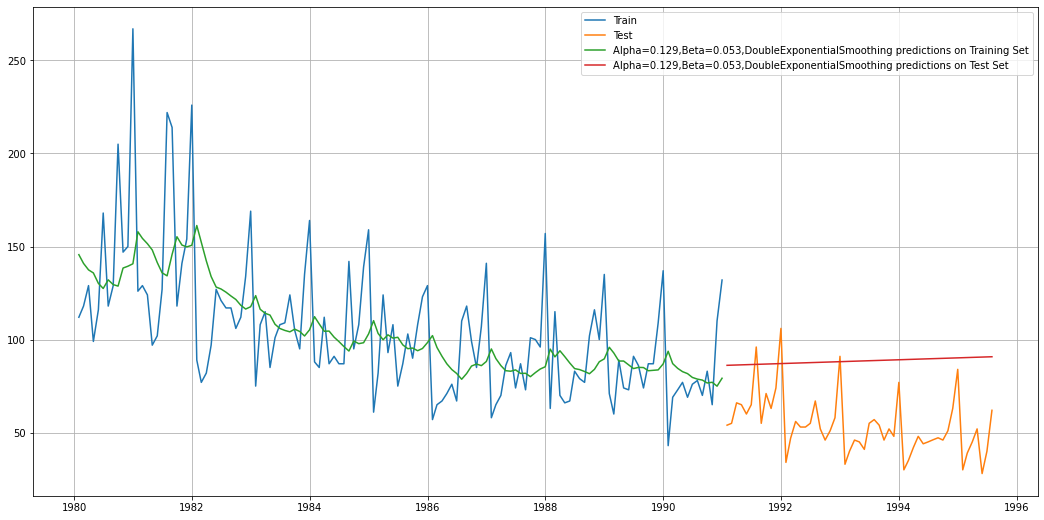

In [125]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(DES_train['Rose'], label='Train')
plt.plot(DES_test['Rose'], label='Test')

plt.plot(DES_train['predict', 0.129,0.053], label='Alpha=0.129,Beta=0.053,DoubleExponentialSmoothing predictions on Training Set')
plt.plot(DES_test['predict',0.129,0.053], label='Alpha=0.129,Beta=0.053,DoubleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [126]:
## Training Data -- RMSE

rmse_model_train = metrics.mean_squared_error(DES_train['Rose'],DES_train['predict', 0.129,0.053],squared=False)
print("Alpha=0.129 and Beta=0.053 Double Exponential Smoothing Model forecast on the Training Data: RMSE is %3.3f " %(rmse_model_train))

Alpha=0.129 and Beta=0.053 Double Exponential Smoothing Model forecast on the Training Data: RMSE is 31.923 


In [127]:
## Test Data -- RMSE

rmse_model_test = metrics.mean_squared_error(DES_test['Rose'],DES_test['predict', 0.129,0.053],squared=False)
print("Alpha=0.129 and Beta=0.053 Double Exponential Smoothing Model forecast on the Testing Data: RMSE is %3.3f" %(rmse_model_test))

Alpha=0.129 and Beta=0.053 Double Exponential Smoothing Model forecast on the Testing Data: RMSE is 38.232


In [128]:
results_df6 = pd.DataFrame({'Test RMSE': [rmse_model_test]}
                           ,index=['Alpha=0.129 and Beta=0.053,DoubleExponentialSmoothing'])

Results_df = pd.concat([Results_df, results_df6])
Results_df

Test RMSE
RegressionOnTime                                    51.391890
NaiveModel                                          79.672238
SimpleAverageModel                                  53.413057
2pointTrailingMovingAverage                         11.529994
4pointTrailingMovingAverage                         14.444342
6pointTrailingMovingAverage                         14.554944
9pointTrailingMovingAverage                         14.721499
Alpha=0.09,SimpleExponentialSmoothing               36.748163
Alpha=0.09,SimpleExponentialSmoothing               36.779971
Alpha=0.129 and Beta=0.053,DoubleExponentialSmo...  38.232286

#### Model8:Double Exponential Smoothing Model in range 0.01 to 1

In [129]:
DES_train_d = Train.copy()
DES_test_d = Test.copy()

In [130]:
model_DES_d = Holt(DES_train_d['Rose'])

In [131]:
## First we will define an empty dataframe to store our values from the loop

results_df_d = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Test RMSE': []})
results_df_d

Empty DataFrame
Columns: [Alpha Values, Beta Values, Train RMSE, Test RMSE]
Index: []

In [132]:
for i in np.arange(0.3,1.1,0.1):
    for j in np.arange(0.3,1.1,0.1):
        model_DES_d_alpha_i_beta_j = model_DES_d.fit(smoothing_level=i,smoothing_slope=j,optimized=True,use_brute=True)
        DES_train_d['predict',i,j] = model_DES_d_alpha_i_beta_j.fittedvalues
        DES_test_d['predict',i,j] = model_DES_d_alpha_i_beta_j.forecast(steps=len(DES_test_d))
        
        rmse_model_d_train = metrics.mean_squared_error(DES_train_d['Rose'],DES_train_d['predict',i,j],squared=False)
        
        rmse_model_d_test = metrics.mean_squared_error(DES_test_d['Rose'],DES_test_d['predict',i,j],squared=False)
        
        results_df_d = results_df_d.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model_d_train
                                      ,'Test RMSE':rmse_model_d_test}, ignore_index=True)

In [133]:
results_df_d

Alpha Values  Beta Values  Train RMSE   Test RMSE
0            0.3          0.3   35.928003  265.509912
1            0.3          0.4   37.356026  358.693008
2            0.3          0.5   38.828384  451.752171
3            0.3          0.6   40.201555  536.896028
4            0.3          0.7   41.313274  601.558209
..           ...          ...         ...         ...
59           1.0          0.6   51.828562  801.622225
60           1.0          0.7   54.493671  841.834548
61           1.0          0.8   57.362069  853.907502
62           1.0          0.9   60.470112  834.652915
63           1.0          1.0   63.869184  780.021606

[64 rows x 4 columns]

In [134]:
results_df_d.sort_values(by=['Test RMSE'], ascending=True)

Alpha Values  Beta Values  Train RMSE    Test RMSE
0            0.3          0.3   35.928003   265.509912
8            0.4          0.3   36.733732   339.248849
1            0.3          0.4   37.356026   358.693008
16           0.5          0.3   37.424080   394.214956
24           0.6          0.3   38.343309   439.238366
..           ...          ...         ...          ...
46           0.8          0.9   51.755479  1052.406630
38           0.7          0.9   48.538766  1061.789751
47           0.8          1.0   53.842548  1095.054109
31           0.6          1.0   47.188384  1102.027591
39           0.7          1.0   50.266364  1125.128514

[64 rows x 4 columns]

In [135]:
model_DES_d = Holt(DES_train_d['Rose'])
model_DES_d_autofit = model_DES_d.fit(smoothing_level=0.3,smoothing_slope=0.3,optimized=True,use_brute=True)

In [136]:
print(model_DES_d_autofit.summary())

                              Holt Model Results                              
Dep. Variable:                   Rose   No. Observations:                  132
Model:                           Holt   SSE                         170388.426
Optimized:                       True   AIC                            953.520
Trend:                       Additive   BIC                            965.052
Seasonal:                        None   AICC                           954.192
Seasonal Periods:                None   Date:                 Wed, 23 Feb 2022
Box-Cox:                        False   Time:                         20:48:09
Box-Cox Coeff.:                  None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.3000000                alpha                False
smoothing_trend            0.3000000                

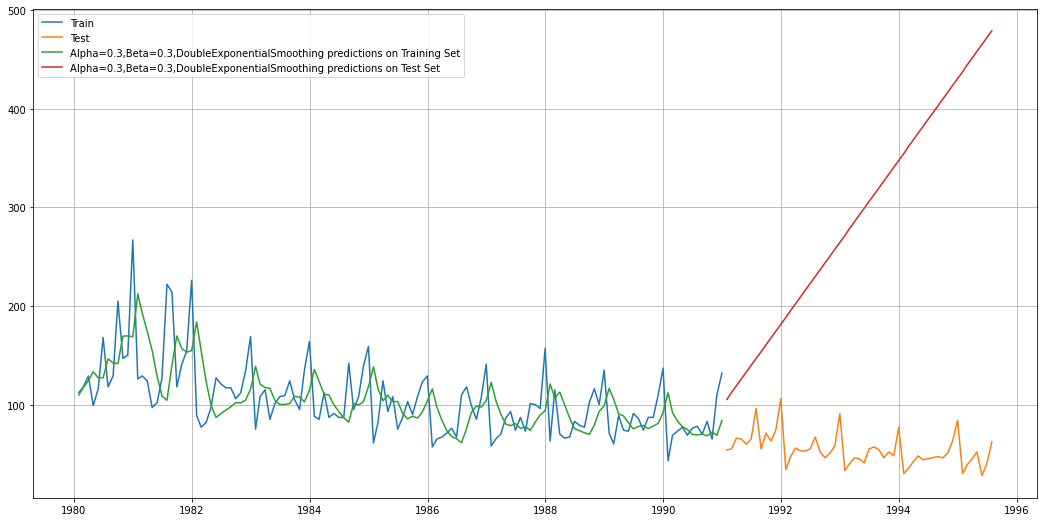

In [137]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(DES_train_d['Rose'], label='Train')
plt.plot(DES_test_d['Rose'], label='Test')

plt.plot(DES_train_d['predict', 0.3, 0.3], label='Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing predictions on Training Set')
plt.plot(DES_test_d['predict', 0.3, 0.3], label='Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [138]:
results_df7 = pd.DataFrame({'Test RMSE': [results_df_d['Test RMSE'][0]]}
                           ,index=['Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing'])

Results_df = pd.concat([Results_df, results_df7])
Results_df

Test RMSE
RegressionOnTime                                     51.391890
NaiveModel                                           79.672238
SimpleAverageModel                                   53.413057
2pointTrailingMovingAverage                          11.529994
4pointTrailingMovingAverage                          14.444342
6pointTrailingMovingAverage                          14.554944
9pointTrailingMovingAverage                          14.721499
Alpha=0.09,SimpleExponentialSmoothing                36.748163
Alpha=0.09,SimpleExponentialSmoothing                36.779971
Alpha=0.129 and Beta=0.053,DoubleExponentialSmo...   38.232286
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       265.509912

#### Model9:Triple Exponential Smoothing (automated)

In [139]:
TES_train = Train.copy()
TES_test = Test.copy()

In [140]:
model_TES = ExponentialSmoothing(TES_train['Rose'], freq='M', trend='mul',seasonal='mul')

In [141]:
model_TES_autofit = model_TES.fit(optimized=True,use_brute=True)

In [142]:
model_TES_autofit.params

{'smoothing_level': 0.07584740943235788,
 'smoothing_trend': 0.0541761059846845,
 'smoothing_seasonal': 0.4106725959851642,
 'damping_trend': nan,
 'initial_level': 76.64403633337834,
 'initial_trend': 1.0030985650232194,
 'initial_seasons': array([1.68546935, 1.76689345, 1.91745262, 1.58925168, 1.7466891 ,
        2.19981462, 2.30804903, 2.37734574, 2.67459542, 2.20924181,
        2.31570102, 3.57867301]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [143]:
print(model_TES_autofit.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                     Rose   No. Observations:                  132
Model:             ExponentialSmoothing   SSE                          61676.733
Optimized:                         True   AIC                            843.386
Trend:                   Multiplicative   BIC                            889.510
Seasonal:                Multiplicative   AICC                           849.439
Seasonal Periods:                    12   Date:                 Wed, 23 Feb 2022
Box-Cox:                          False   Time:                         20:48:10
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.0758474                alpha                 True
smoothing_trend          

In [144]:
## Prediction on the training data

TES_train['auto_predict'] = model_TES_autofit.fittedvalues
TES_train.head()

Rose  auto_predict
Time_Stamp                     
1980-01-31  112.0    129.581451
1980-02-29  118.0    134.784925
1980-03-31  129.0    145.182128
1980-04-30   99.0    119.501738
1980-05-31  116.0    129.742646

In [145]:
## Prediction on the test data

TES_test['auto_predict'] = model_TES_autofit.forecast(steps=len(TES_test))
TES_test.head()

Rose  auto_predict
Time_Stamp                    
1991-01-31  54.0     50.513209
1991-02-28  55.0     66.533585
1991-03-31  66.0     70.370637
1991-04-30  65.0     68.076802
1991-05-31  60.0     65.850440

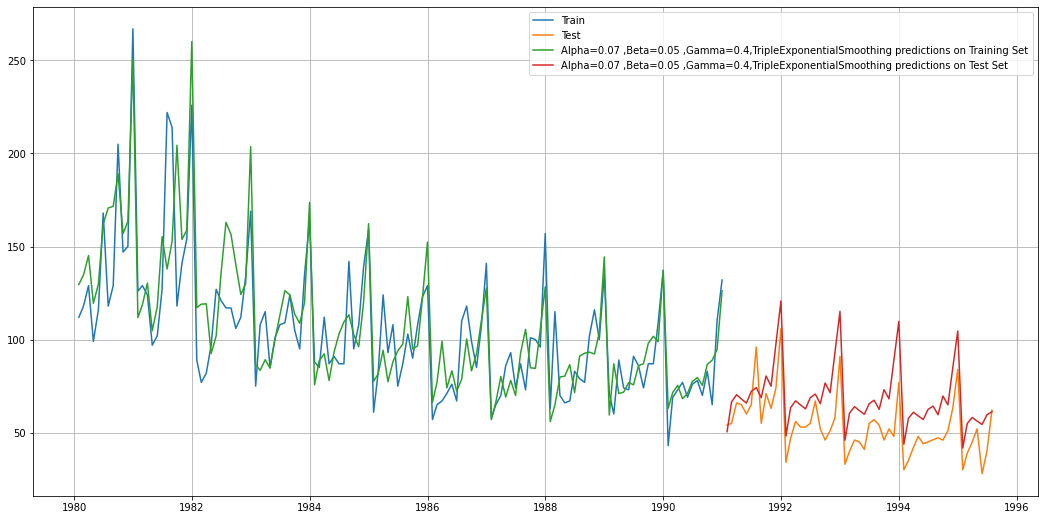

In [146]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(18,9))
plt.plot(TES_train['Rose'], label='Train')
plt.plot(TES_test['Rose'], label='Test')

plt.plot(TES_train['auto_predict'], label='Alpha=0.07 ,Beta=0.05 ,Gamma=0.4,TripleExponentialSmoothing predictions on Training Set')
plt.plot(TES_test['auto_predict'], label='Alpha=0.07 ,Beta=0.05 ,Gamma=0.4,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [147]:
## Training Data-- RMSE

rmse_model_train = metrics.mean_squared_error(TES_train['Rose'],TES_train['auto_predict'],squared=False)
print("Alpha: 0.07, Beta: 0.05 and Gamma: 0.4, Triple Exponential Smoothing Model forecast on the Training Data: RMSE is %3.3f " %(rmse_model_train))

Alpha: 0.07, Beta: 0.05 and Gamma: 0.4, Triple Exponential Smoothing Model forecast on the Training Data: RMSE is 21.616 


In [148]:
## Test Data

rmse_model_test = metrics.mean_squared_error(TES_test['Rose'],TES_test['auto_predict'],squared=False)
print("Alpha: 0.07, Beta: 0.05 and Gamma: 0.4, Triple Exponential Smoothing Model forecast on the Test Data: RMSE is %3.3f" %(rmse_model_test))

Alpha: 0.07, Beta: 0.05 and Gamma: 0.4, Triple Exponential Smoothing Model forecast on the Test Data: RMSE is 17.760


In [149]:
results_df8 = pd.DataFrame({'Test RMSE': [rmse_model_test]}
                           ,index=['Alpha=0.07, Beta=0.05 ,Gamma=0.4,TripleExponentialSmoothing'])

Results_df = pd.concat([Results_df, results_df8])
Results_df

Test RMSE
RegressionOnTime                                     51.391890
NaiveModel                                           79.672238
SimpleAverageModel                                   53.413057
2pointTrailingMovingAverage                          11.529994
4pointTrailingMovingAverage                          14.444342
6pointTrailingMovingAverage                          14.554944
9pointTrailingMovingAverage                          14.721499
Alpha=0.09,SimpleExponentialSmoothing                36.748163
Alpha=0.09,SimpleExponentialSmoothing                36.779971
Alpha=0.129 and Beta=0.053,DoubleExponentialSmo...   38.232286
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       265.509912
Alpha=0.07, Beta=0.05 ,Gamma=0.4,TripleExponent...   17.759995

#### Model:9 Triple Exponential Smoothing in range 0.3 to 1.1

In [150]:
## First we will define an empty dataframe to store our values from the loop

results_df_t = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[]
                                ,'Test RMSE': []})
results_df_t

Empty DataFrame
Columns: [Alpha Values, Beta Values, Gamma Values, Train RMSE, Test RMSE]
Index: []

In [151]:
TES_train_t = Train.copy()
TES_test_t = Test.copy()

In [152]:
model_TES_t = ExponentialSmoothing(TES_train_t['Rose'], freq='M', trend='mul',seasonal='mul')

In [153]:
for i in np.arange(0.3,1.0,1.1):
    for j in np.arange(0.3,1.1,0.1):
        for k in np.arange(0.3,1.1,0.1):
            model_TES_t_alpha_i_beta_j_gamma_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=True,use_brute=True)
            TES_train_t['predict',i,j,k] = model_TES_t_alpha_i_beta_j_gamma_k.fittedvalues
            TES_test_t['predict',i,j,k] = model_TES_t_alpha_i_beta_j_gamma_k.forecast(steps=len(TES_test_t))
        
            rmse_model_t_train = metrics.mean_squared_error(TES_train_t['Rose'],TES_train_t['predict',i,j,k],squared=False)
        
            rmse_model_t_test = metrics.mean_squared_error(TES_test_t['Rose'],TES_test_t['predict',i,j,k],squared=False)
        
            results_df_t = results_df_t.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,'Train RMSE':rmse_model_t_train
                                      ,'Test RMSE':rmse_model_t_test}, ignore_index=True)

In [154]:
results_df_t

Alpha Values  Beta Values  Gamma Values    Train RMSE     Test RMSE
0            0.3          0.3           0.3  2.321497e+01  2.739324e+01
1            0.3          0.3           0.4  2.450411e+01  1.434853e+01
2            0.3          0.3           0.5  2.618245e+01  1.231361e+01
3            0.3          0.3           0.6  2.822341e+01  2.540659e+01
4            0.3          0.3           0.7  2.969632e+01  3.291582e+01
..           ...          ...           ...           ...           ...
59           0.3          1.0           0.6  6.287437e+02  1.702541e+38
60           0.3          1.0           0.7  3.213216e+03  5.610452e+01
61           0.3          1.0           0.8  3.488426e+04  6.120319e+01
62           0.3          1.0           0.9  1.558968e+06  2.769702e+06
63           0.3          1.0           1.0  9.456280e+05  4.063676e+30

[64 rows x 5 columns]

In [155]:
results_df_t.sort_values(by=['Test RMSE'], ascending=True)

Alpha Values  Beta Values  Gamma Values     Train RMSE     Test RMSE
9            0.3          0.4           0.4      25.600699  1.164579e+01
2            0.3          0.3           0.5      26.182447  1.231361e+01
26           0.3          0.6           0.5      29.096604  1.232594e+01
35           0.3          0.7           0.6      31.324056  1.272823e+01
1            0.3          0.3           0.4      24.504110  1.434853e+01
..           ...          ...           ...            ...           ...
31           0.3          0.6           1.0     717.674696  1.981314e+24
47           0.3          0.8           1.0   22863.160756  6.913220e+25
55           0.3          0.9           1.0  242721.534347  3.177958e+28
63           0.3          1.0           1.0  945627.989589  4.063676e+30
59           0.3          1.0           0.6     628.743682  1.702541e+38

[64 rows x 5 columns]

In [156]:
model_TES_t_autofit = model_TES_t.fit(smoothing_level=0.3,smoothing_slope=0.4,smoothing_seasonal=0.4,optimized=True,use_brute=True)

In [157]:
print(model_TES_t_autofit.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                     Rose   No. Observations:                  132
Model:             ExponentialSmoothing   SSE                          86512.247
Optimized:                         True   AIC                            888.052
Trend:                   Multiplicative   BIC                            934.176
Seasonal:                Multiplicative   AICC                           894.105
Seasonal Periods:                    12   Date:                 Wed, 23 Feb 2022
Box-Cox:                          False   Time:                         20:48:16
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.3000000                alpha                False
smoothing_trend          

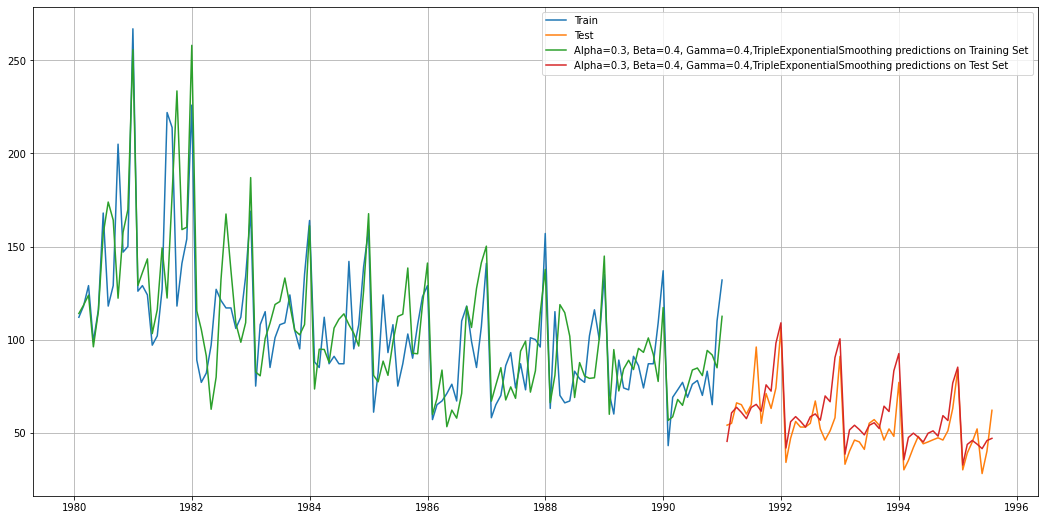

In [158]:
## Plotting on both the Training and Test data using brute force alpha, beta and gamma determination

plt.figure(figsize=(18,9))
plt.plot(TES_train_t['Rose'], label='Train')
plt.plot(TES_test_t['Rose'], label='Test')

plt.plot(TES_train_t['predict', 0.3, 0.4, 0.4], label='Alpha=0.3, Beta=0.4, Gamma=0.4,TripleExponentialSmoothing predictions on Training Set')
plt.plot(TES_test_t['predict', 0.3, 0.4, 0.4], label='Alpha=0.3, Beta=0.4, Gamma=0.4,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [159]:
results_df9 = pd.DataFrame({'Test RMSE': [results_df_t['Test RMSE'][9]]}
                           ,index=['Alpha=0.3, Beta=0.4 ,Gamma=0.4,TripleExponentialSmoothing'])

Results_df = pd.concat([Results_df,results_df9])
Results_df

Test RMSE
RegressionOnTime                                     51.391890
NaiveModel                                           79.672238
SimpleAverageModel                                   53.413057
2pointTrailingMovingAverage                          11.529994
4pointTrailingMovingAverage                          14.444342
6pointTrailingMovingAverage                          14.554944
9pointTrailingMovingAverage                          14.721499
Alpha=0.09,SimpleExponentialSmoothing                36.748163
Alpha=0.09,SimpleExponentialSmoothing                36.779971
Alpha=0.129 and Beta=0.053,DoubleExponentialSmo...   38.232286
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       265.509912
Alpha=0.07, Beta=0.05 ,Gamma=0.4,TripleExponent...   17.759995
Alpha=0.3, Beta=0.4 ,Gamma=0.4,TripleExponentia...   11.645793

In [160]:
print('Sorted by RMSE values on the Test Data:','\n',)
Results_df.sort_values(by=['Test RMSE'])

Sorted by RMSE values on the Test Data: 



Test RMSE
2pointTrailingMovingAverage                          11.529994
Alpha=0.3, Beta=0.4 ,Gamma=0.4,TripleExponentia...   11.645793
4pointTrailingMovingAverage                          14.444342
6pointTrailingMovingAverage                          14.554944
9pointTrailingMovingAverage                          14.721499
Alpha=0.07, Beta=0.05 ,Gamma=0.4,TripleExponent...   17.759995
Alpha=0.09,SimpleExponentialSmoothing                36.748163
Alpha=0.09,SimpleExponentialSmoothing                36.779971
Alpha=0.129 and Beta=0.053,DoubleExponentialSmo...   38.232286
RegressionOnTime                                     51.391890
SimpleAverageModel                                   53.413057
NaiveModel                                           79.672238
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       265.509912

We see that the best model is the 2pointTrailing Moving Average with multiplicative seasonality.

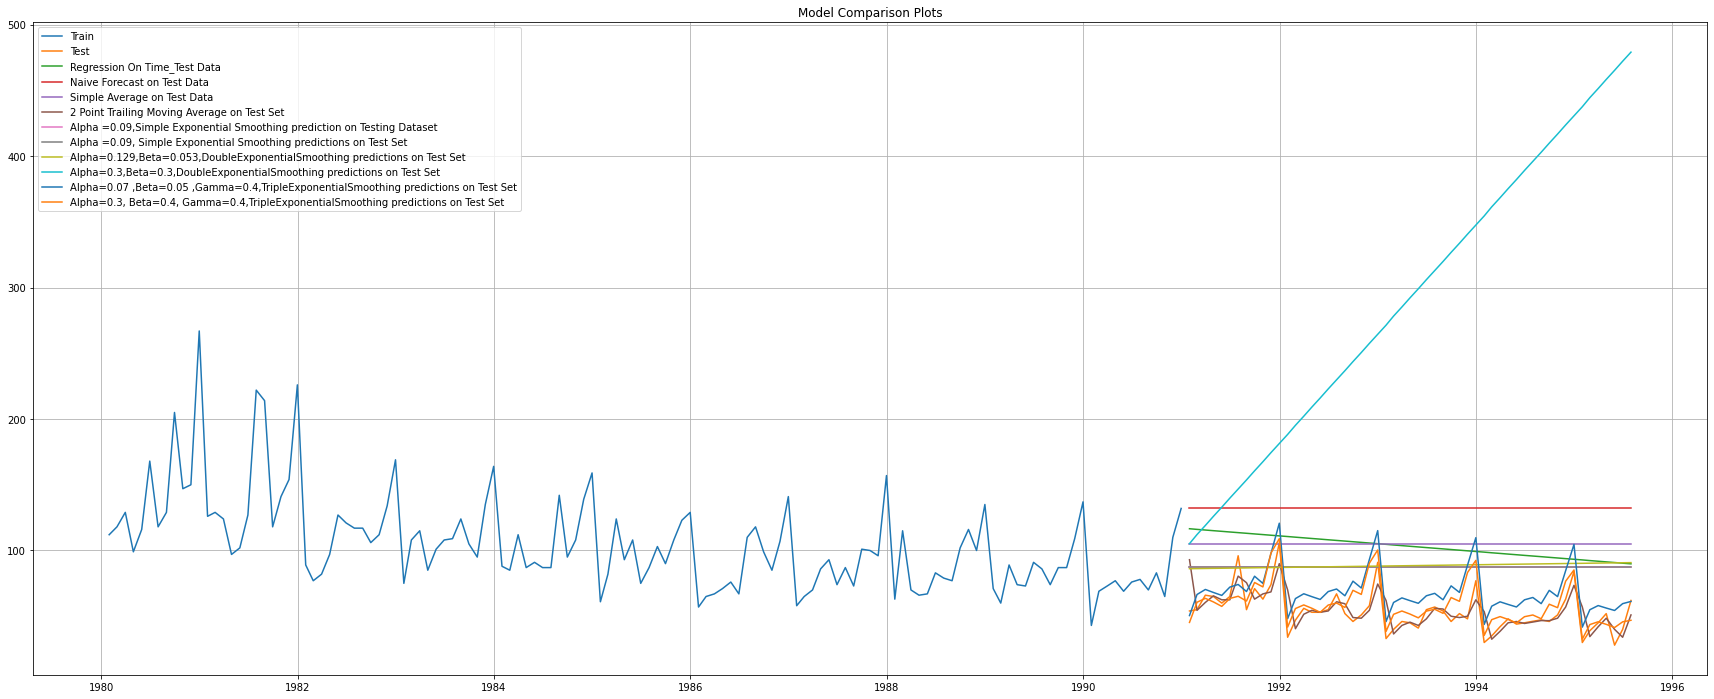

In [161]:
plt.figure(figsize=(30,12))
plt.plot(Train['Rose'], label='Train')
plt.plot(Test['Rose'], label='Test')

plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.plot(trailing_MovingAverage_test['Trailing_2'],label='2 Point Trailing Moving Average on Test Set')
plt.plot(SES_test['predict'], label='Alpha =0.09,Simple Exponential Smoothing prediction on Testing Dataset')
plt.plot(SES_test['predict',0.10], label='Alpha =0.09, Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_test['predict',0.129,0.053], label='Alpha=0.129,Beta=0.053,DoubleExponentialSmoothing predictions on Test Set')
plt.plot(DES_test_d['predict', 0.3, 0.3], label='Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing predictions on Test Set')
plt.plot(TES_test['auto_predict'], label='Alpha=0.07 ,Beta=0.05 ,Gamma=0.4,TripleExponentialSmoothing predictions on Test Set')
plt.plot(TES_test_t['predict', 0.3, 0.4, 0.4], label='Alpha=0.3, Beta=0.4, Gamma=0.4,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

## 5. Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment. Note: Stationarity should be checked at alpha = 0.05.

Check for stationarity of the series at α = 0.05 using appropriate statistical tests.


In [162]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean()
    rolstd = timeseries.rolling(window=7).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

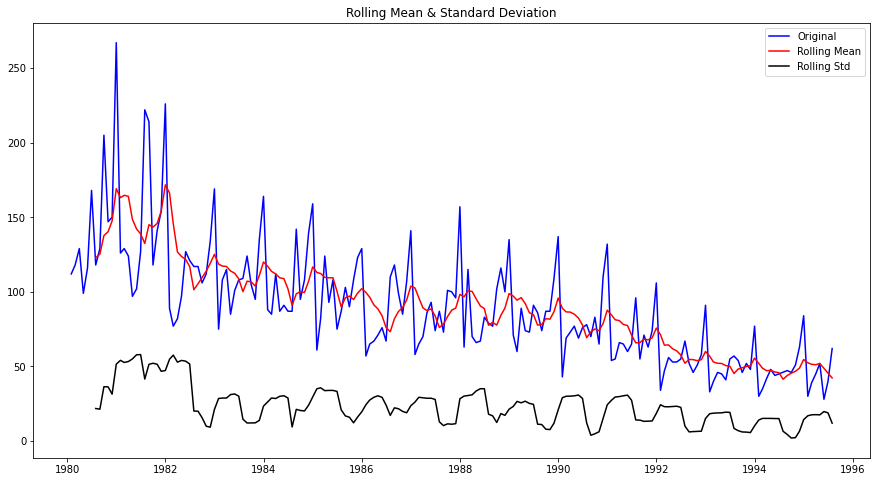

Results of Dickey-Fuller Test:
Test Statistic                  -1.880931
p-value                          0.341084
#Lags Used                      13.000000
Number of Observations Used    173.000000
Critical Value (1%)             -3.468726
Critical Value (5%)             -2.878396
Critical Value (10%)            -2.575756
dtype: float64 



In [163]:
test_stationarity(df['Rose'])

We see that at 5% significant level the Time Series is non-stationary.

In [164]:
# the null hypothesis  for ADF test (H0) is that the time series is non-stationary 
# the alternate hypothesis for ADF test (H1) is that time series is stationary

# since the p-value of the ADF test is greater than the critical value at 5%, we cannot reject the null hypothesis 
# thus the given time given series is non stationary

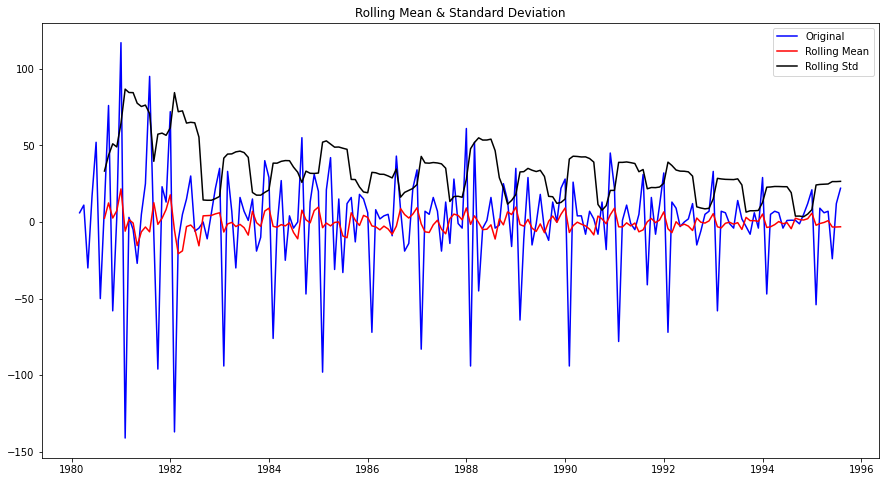

Results of Dickey-Fuller Test:
Test Statistic                -8.044820e+00
p-value                        1.806363e-12
#Lags Used                     1.200000e+01
Number of Observations Used    1.730000e+02
Critical Value (1%)           -3.468726e+00
Critical Value (5%)           -2.878396e+00
Critical Value (10%)          -2.575756e+00
dtype: float64 



In [165]:
test_stationarity(df['Rose'].diff().dropna())

After taking a difference of order 1, we see that at α = 0.05 the Time Series is indeed stationary.

#### Plot the Autocorrelation and the Partial Autocorrelation function plots on the whole data.

In [166]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

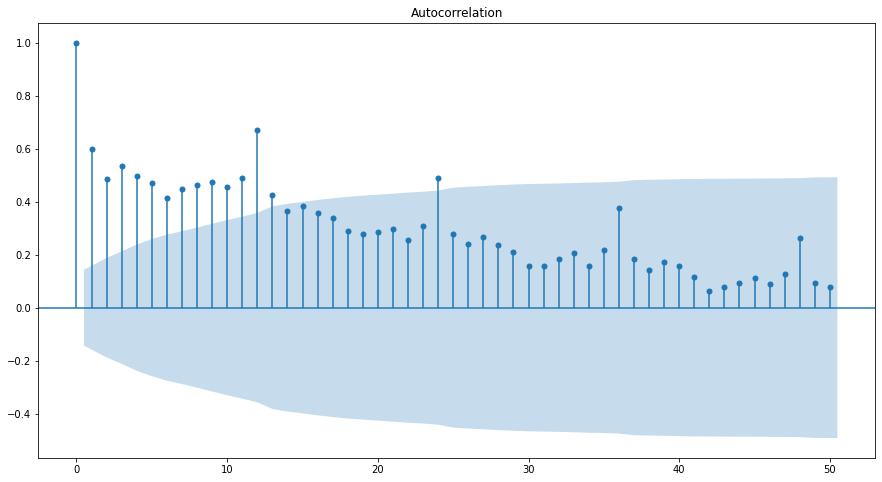

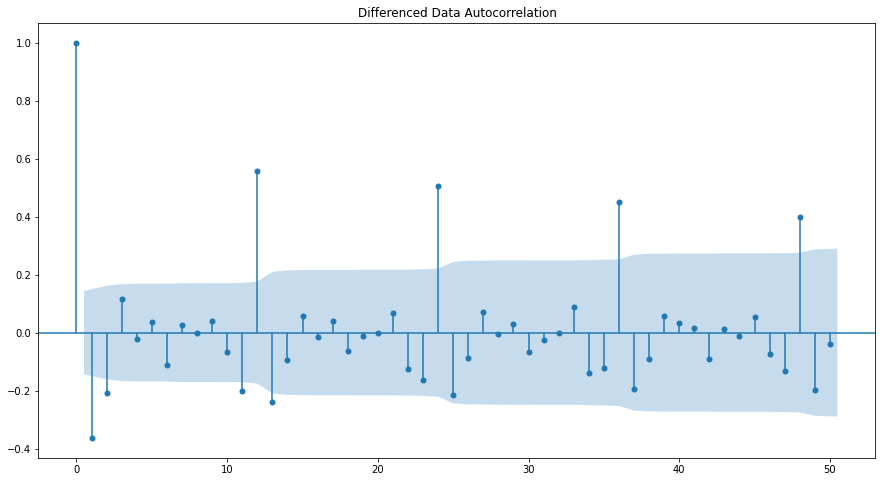

In [167]:
plot_acf(df['Rose'],lags=50)
plot_acf(df['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

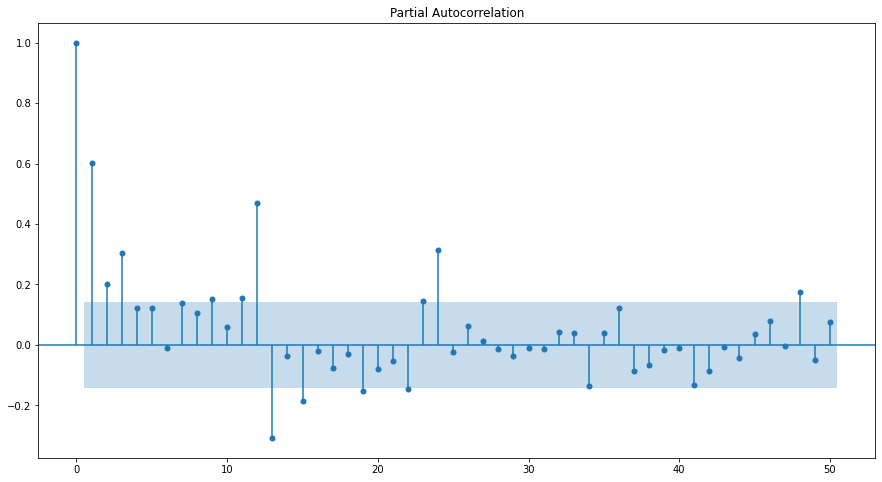

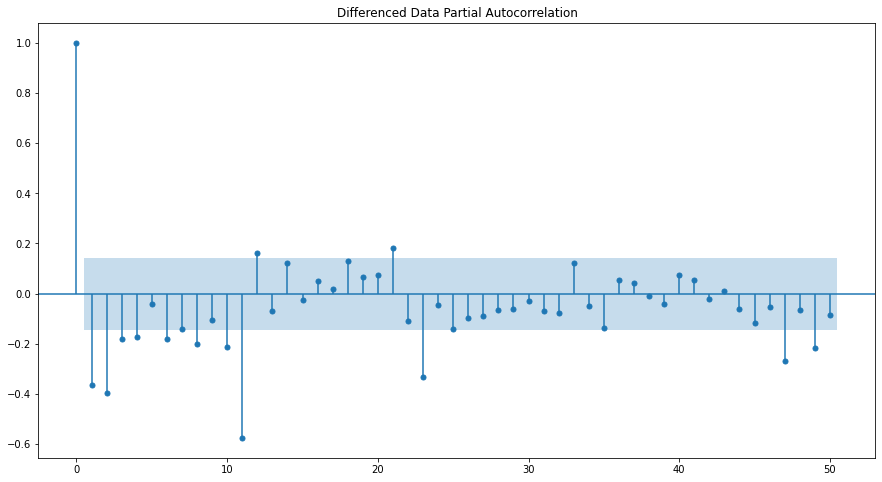

In [168]:
plot_pacf(df['Rose'],lags=50)
plot_pacf(df['Rose'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

#### Check for stationarity of the Training Data Time Series.

In [169]:
#We check for the stationarity only for training data.

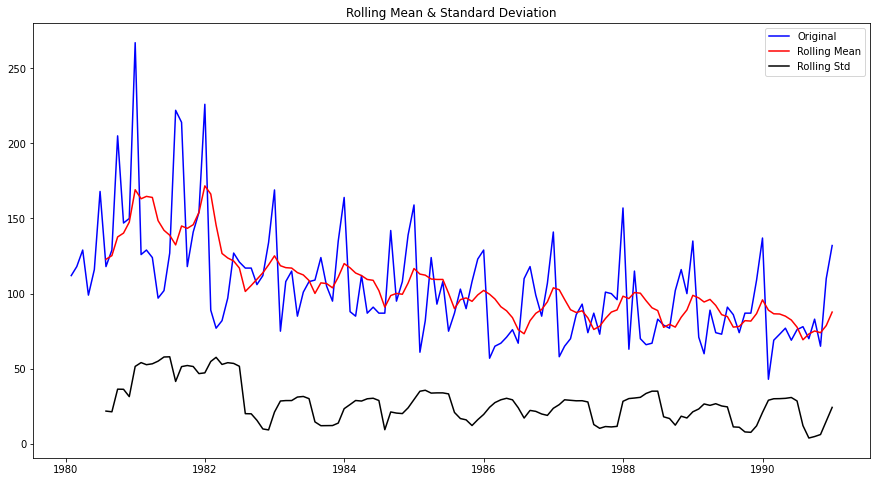

Results of Dickey-Fuller Test:
Test Statistic                  -2.164250
p-value                          0.219476
#Lags Used                      13.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64 



In [170]:
test_stationarity(Train['Rose'])

We see that the series is not stationary at 𝛼 = 0.05.

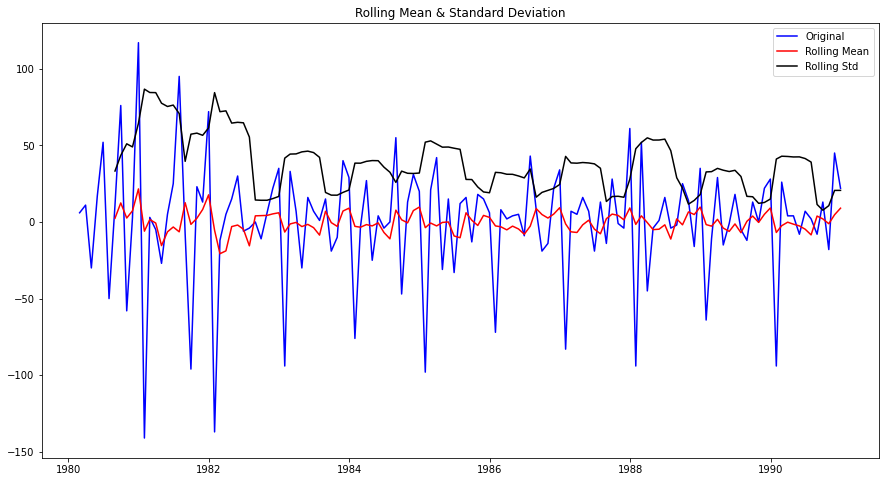

Results of Dickey-Fuller Test:
Test Statistic                -6.592372e+00
p-value                        7.061944e-09
#Lags Used                     1.200000e+01
Number of Observations Used    1.180000e+02
Critical Value (1%)           -3.487022e+00
Critical Value (5%)           -2.886363e+00
Critical Value (10%)          -2.580009e+00
dtype: float64 



In [171]:
test_stationarity(Train['Rose'].diff().dropna())

We see that after taking a difference of order 1 the series have become stationary at  𝛼  = 0.05.

If the series is non-stationary, stationarize the Time Series by taking a difference of the Time Series. Then we can use this particular differenced series to train the ARIMA models. We do not need to worry about stationarity for the Test Data because we are not building any models on the Test Data, we are evaluating our models over there. You can look at other kinds of transformations as part of making the time series stationary like taking logarithms.

In [172]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 132 entries, 1980-01-31 to 1990-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rose    132 non-null    float64
dtypes: float64(1)
memory usage: 2.1 KB


## 6. Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

The data has some seasonality so ideally we should build a SARIMA model. But for demonstration purposes we are building an ARIMA model both by looking at the minimum AIC criterion and by looking at the ACF and the PACF plots.

#### Model10:Automated ARIMA based on AIC criteria

The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2 We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

In [173]:
import itertools
p = q = range(0, 4)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)


In [174]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [175]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(Train['Rose'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:1333.1546729124348
ARIMA(0, 1, 1) - AIC:1282.3098319748315
ARIMA(0, 1, 2) - AIC:1279.6715288535743
ARIMA(0, 1, 3) - AIC:1280.5453761734657
ARIMA(1, 1, 0) - AIC:1317.3503105381526
ARIMA(1, 1, 1) - AIC:1280.5742295380046
ARIMA(1, 1, 2) - AIC:1279.8707234231906
ARIMA(1, 1, 3) - AIC:1281.8707223310007
ARIMA(2, 1, 0) - AIC:1298.6110341604908
ARIMA(2, 1, 1) - AIC:1281.5078621868597
ARIMA(2, 1, 2) - AIC:1281.8707222264215
ARIMA(2, 1, 3) - AIC:1274.695136341693
ARIMA(3, 1, 0) - AIC:1297.4810917271702
ARIMA(3, 1, 1) - AIC:1282.419277627203
ARIMA(3, 1, 2) - AIC:1283.720740597714
ARIMA(3, 1, 3) - AIC:1278.6613049048526


In [176]:
ARIMA_AIC.sort_values(by='AIC',ascending=True)

param          AIC
11  (2, 1, 3)  1274.695136
15  (3, 1, 3)  1278.661305
2   (0, 1, 2)  1279.671529
6   (1, 1, 2)  1279.870723
3   (0, 1, 3)  1280.545376
5   (1, 1, 1)  1280.574230
9   (2, 1, 1)  1281.507862
10  (2, 1, 2)  1281.870722
7   (1, 1, 3)  1281.870722
1   (0, 1, 1)  1282.309832
13  (3, 1, 1)  1282.419278
14  (3, 1, 2)  1283.720741
12  (3, 1, 0)  1297.481092
8   (2, 1, 0)  1298.611034
4   (1, 1, 0)  1317.350311
0   (0, 1, 0)  1333.154673

In [177]:
arima = ARIMA(Train['Rose'], order=(2,1,3))

results_Arima = arima.fit()

print(results_Arima.summary())

                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  132
Model:                 ARIMA(2, 1, 3)   Log Likelihood                -631.348
Date:                Wed, 23 Feb 2022   AIC                           1274.695
Time:                        20:48:25   BIC                           1291.946
Sample:                    01-31-1980   HQIC                          1281.705
                         - 12-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6779      0.084    -20.050      0.000      -1.842      -1.514
ar.L2         -0.7289      0.084     -8.711      0.000      -0.893      -0.565
ma.L1          1.0448      0.662      1.578      0.1

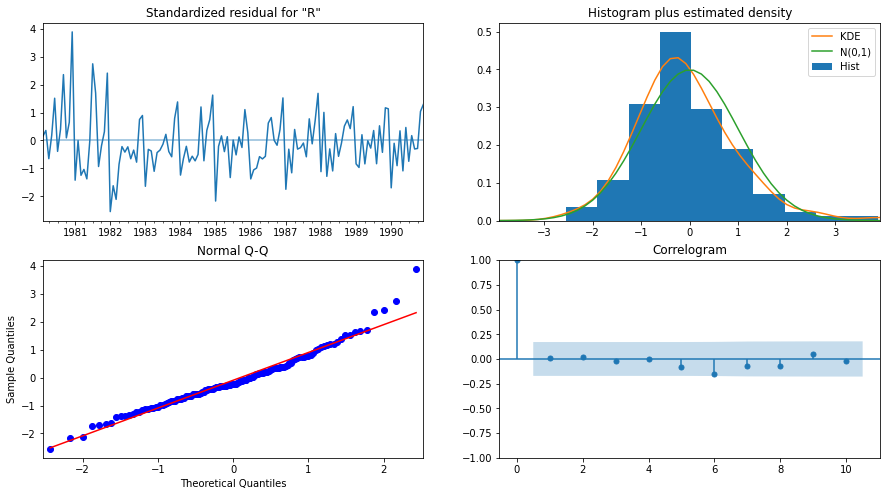

In [178]:
results_Arima.plot_diagnostics();

In [179]:
predicted_autoARIMA = results_Arima.forecast(steps=len(Test))
predicted_autoARIMA

1991-01-31    85.624397
1991-02-28    90.524748
1991-03-31    81.975651
1991-04-30    92.748917
1991-05-31    80.903042
1991-06-30    92.927587
1991-07-31    81.385027
1991-08-31    91.988615
1991-09-30    82.609273
1991-10-31    90.618774
1991-11-30    84.015489
1991-12-31    89.257641
1992-01-31    85.274463
1992-02-29    88.137225
1992-03-31    86.236845
1992-04-30    87.339026
1992-05-31    86.874737
1992-06-30    86.850452
1992-07-31    87.229604
1992-08-31    86.611107
1992-09-30    87.372564
1992-10-31    86.545678
1992-11-30    87.378153
1992-12-31    86.583988
1993-01-31    87.309797
1993-02-28    86.670764
1993-03-31    87.214014
1993-04-30    86.768235
1993-05-31    87.120274
1993-06-30    86.854482
1993-07-31    87.043880
1993-08-31    86.919805
1993-09-30    86.989951
1993-10-31    86.962684
1993-11-30    86.957311
1993-12-31    86.986201
1994-01-31    86.941641
1994-02-28    86.995353
1994-03-31    86.937705
1994-04-30    86.995287
1994-05-31    86.940685
1994-06-30    86

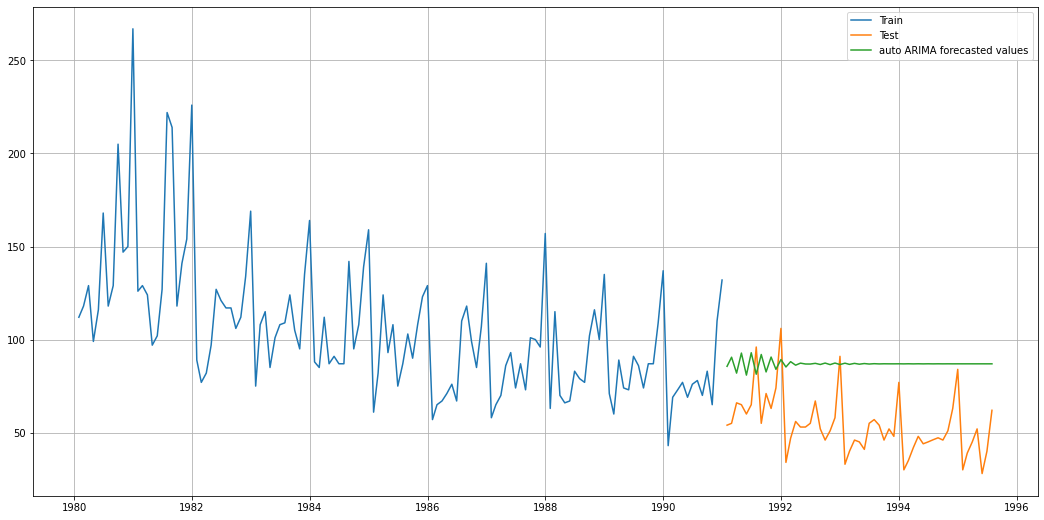

In [180]:
plt.figure(figsize=(18,9))
plt.plot(Train['Rose'], label='Train')
plt.plot(Test['Rose'], label='Test')

plt.plot(predicted_autoARIMA, label='auto ARIMA forecasted values')

plt.legend(loc='best')
plt.grid();

In [181]:
from sklearn.metrics import mean_squared_error

RMSE_autoARIMA = mean_squared_error(Test['Rose'],predicted_autoARIMA,squared=False)

print('RMSE for the autofit ARIMA model:',RMSE_autoARIMA)

RMSE for the autofit ARIMA model: 36.76789623595707


In [182]:
results_df10 = pd.DataFrame({'Test RMSE': [RMSE_autoARIMA]}
                           ,index=['automated ARIMA(2,1,3)'])

Results_df = pd.concat([Results_df, results_df10])
Results_df

Test RMSE
RegressionOnTime                                     51.391890
NaiveModel                                           79.672238
SimpleAverageModel                                   53.413057
2pointTrailingMovingAverage                          11.529994
4pointTrailingMovingAverage                          14.444342
6pointTrailingMovingAverage                          14.554944
9pointTrailingMovingAverage                          14.721499
Alpha=0.09,SimpleExponentialSmoothing                36.748163
Alpha=0.09,SimpleExponentialSmoothing                36.779971
Alpha=0.129 and Beta=0.053,DoubleExponentialSmo...   38.232286
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       265.509912
Alpha=0.07, Beta=0.05 ,Gamma=0.4,TripleExponent...   17.759995
Alpha=0.3, Beta=0.4 ,Gamma=0.4,TripleExponentia...   11.645793
automated ARIMA(2,1,3)                               36.767896

#### Model11: Automated SARIMA model with seasonality 6 & 12

Let us look at the ACF plot once more to understand the seasonal parameter for the SARIMA model.

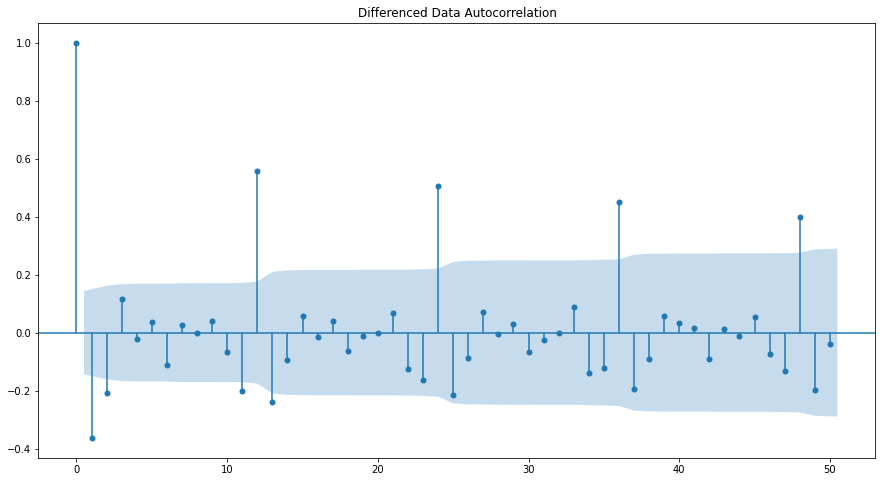

In [183]:
plot_acf(df['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

We see that there can be a seasonality of 6 as well as 12. We will run our auto SARIMA models by setting seasonality both as 6 and 12.

#Setting the seasonality as 6 for the first iteration of the auto SARIMA model.

In [184]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 6)
Model: (0, 1, 2)(0, 0, 2, 6)
Model: (1, 1, 0)(1, 0, 0, 6)
Model: (1, 1, 1)(1, 0, 1, 6)
Model: (1, 1, 2)(1, 0, 2, 6)
Model: (2, 1, 0)(2, 0, 0, 6)
Model: (2, 1, 1)(2, 0, 1, 6)
Model: (2, 1, 2)(2, 0, 2, 6)


In [185]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [186]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(Train['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 6) - AIC:1323.9657875279158
SARIMA(0, 1, 0)x(0, 0, 1, 6) - AIC:1264.4996261113856
SARIMA(0, 1, 0)x(0, 0, 2, 6) - AIC:1144.7077471827427
SARIMA(0, 1, 0)x(1, 0, 0, 6) - AIC:1274.7897737087983
SARIMA(0, 1, 0)x(1, 0, 1, 6) - AIC:1241.7870945149098
SARIMA(0, 1, 0)x(1, 0, 2, 6) - AIC:1146.3093266721962
SARIMA(0, 1, 0)x(2, 0, 0, 6) - AIC:1137.9167236212038
SARIMA(0, 1, 0)x(2, 0, 1, 6) - AIC:1137.4533629515133
SARIMA(0, 1, 0)x(2, 0, 2, 6) - AIC:1117.0224426305313
SARIMA(0, 1, 1)x(0, 0, 0, 6) - AIC:1263.5369097383968
SARIMA(0, 1, 1)x(0, 0, 1, 6) - AIC:1201.383254802955
SARIMA(0, 1, 1)x(0, 0, 2, 6) - AIC:1097.1908217752782
SARIMA(0, 1, 1)x(1, 0, 0, 6) - AIC:1222.4354735745048
SARIMA(0, 1, 1)x(1, 0, 1, 6) - AIC:1160.4386253745872
SARIMA(0, 1, 1)x(1, 0, 2, 6) - AIC:1084.8564124020752
SARIMA(0, 1, 1)x(2, 0, 0, 6) - AIC:1095.7490379982137
SARIMA(0, 1, 1)x(2, 0, 1, 6) - AIC:1097.645518770187
SARIMA(0, 1, 1)x(2, 0, 2, 6) - AIC:1053.0044082629488
SARIMA(0, 1, 2)x(0, 0, 0, 6) -

In [187]:
SARIMA_AIC.sort_values(by=['AIC']).head()

param      seasonal          AIC
53  (1, 1, 2)  (2, 0, 2, 6)  1041.655817
26  (0, 1, 2)  (2, 0, 2, 6)  1043.600261
80  (2, 1, 2)  (2, 0, 2, 6)  1045.220637
71  (2, 1, 1)  (2, 0, 2, 6)  1051.673461
44  (1, 1, 1)  (2, 0, 2, 6)  1052.778470

In [188]:
import statsmodels.api as sm

auto_SARIMA_6 = sm.tsa.statespace.SARIMAX(Train['Rose'].values,
                                order=(1, 1, 2),
                                seasonal_order=(2, 0, 2, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_6 = auto_SARIMA_6.fit(maxiter=1000)
print(results_auto_SARIMA_6.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  132
Model:             SARIMAX(1, 1, 2)x(2, 0, 2, 6)   Log Likelihood                -512.828
Date:                           Wed, 23 Feb 2022   AIC                           1041.656
Time:                                   20:49:04   BIC                           1063.685
Sample:                                        0   HQIC                          1050.598
                                           - 132                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5939      0.152     -3.900      0.000      -0.892      -0.295
ma.L1         -0.1954    829.987     -0.000

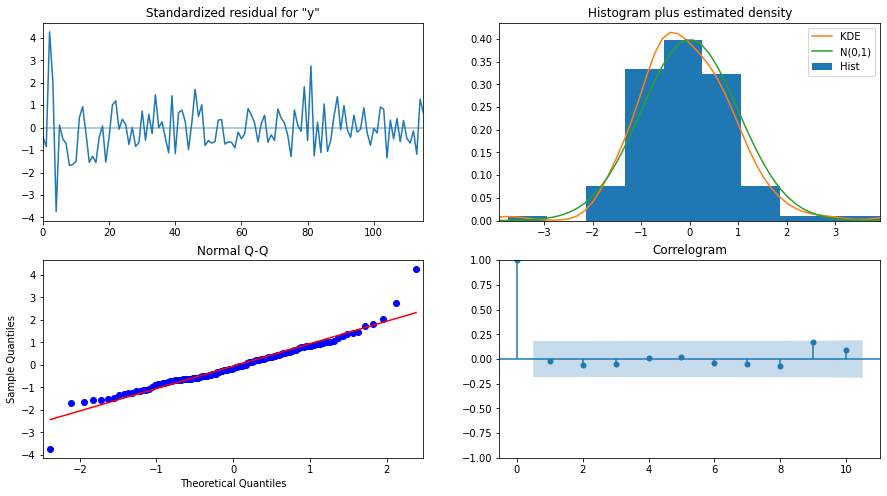

In [189]:
results_auto_SARIMA_6.plot_diagnostics()
plt.show()

In [190]:
#Predict on the Test Set using this model and evaluate the model.

In [191]:
predicted_auto_SARIMA_6 = results_auto_SARIMA_6.get_forecast(steps=len(Test))

In [192]:
predicted_auto_SARIMA_6.summary_frame(alpha=0.05).head()

y       mean    mean_se  mean_ci_lower  mean_ci_upper
0  62.841749  18.848160      25.900035      99.783463
1  67.630935  19.299990      29.803649     105.458220
2  74.746784  19.412556      36.698873     112.794694
3  71.325791  19.475509      33.154496     109.497087
4  76.017479  19.483790      37.829953     114.205006

In [193]:
RMSE_autoSARIMA6 = mean_squared_error(Test['Rose'],predicted_auto_SARIMA_6.predicted_mean,squared=False)
print('RMSE for the autofit ARIMA model:',RMSE_autoSARIMA6)

RMSE for the autofit ARIMA model: 26.077593566351386


In [194]:
results_df11 = pd.DataFrame({'Test RMSE': [RMSE_autoSARIMA6]}
                           ,index=['automatedSARIMA(1,1,2)(2,0,2,6)'])


Results_df = pd.concat([Results_df,results_df11])

Results_df

Test RMSE
RegressionOnTime                                     51.391890
NaiveModel                                           79.672238
SimpleAverageModel                                   53.413057
2pointTrailingMovingAverage                          11.529994
4pointTrailingMovingAverage                          14.444342
6pointTrailingMovingAverage                          14.554944
9pointTrailingMovingAverage                          14.721499
Alpha=0.09,SimpleExponentialSmoothing                36.748163
Alpha=0.09,SimpleExponentialSmoothing                36.779971
Alpha=0.129 and Beta=0.053,DoubleExponentialSmo...   38.232286
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       265.509912
Alpha=0.07, Beta=0.05 ,Gamma=0.4,TripleExponent...   17.759995
Alpha=0.3, Beta=0.4 ,Gamma=0.4,TripleExponentia...   11.645793
automated ARIMA(2,1,3)                               36.767896
automatedSARIMA(1,1,2)(2,0,2,6)                      26.077594

Setting the seasonality as 12 for the second iteration of the auto SARIMA model.

In [196]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)


In [197]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [198]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(Train['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:1323.9657875279158
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1145.423082720741
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:976.4375296380895
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1139.921738995602
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1116.0207869385804
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:969.6913635752474
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:960.8812220353041
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:962.8794540697579
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:955.5735408945699
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:1263.5369097383968
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1098.555482591834
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:923.6314049383752
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1095.793632491829
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1054.743433094686
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:918.8573483315454
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:914.5982866535874
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:915.3332430461681
SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:901.1988261883185
SARIMA(0, 1, 2)x(0, 0, 0,

In [199]:
SARIMA_AIC.sort_values(by=['AIC'], ascending=True)

param       seasonal          AIC
26  (0, 1, 2)  (2, 0, 2, 12)   887.937509
53  (1, 1, 2)  (2, 0, 2, 12)   889.905980
80  (2, 1, 2)  (2, 0, 2, 12)   890.668798
69  (2, 1, 1)  (2, 0, 0, 12)   896.518161
78  (2, 1, 2)  (2, 0, 0, 12)   897.346444
..        ...            ...          ...
63  (2, 1, 1)  (0, 0, 0, 12)  1263.231523
9   (0, 1, 1)  (0, 0, 0, 12)  1263.536910
54  (2, 1, 0)  (0, 0, 0, 12)  1280.253756
27  (1, 1, 0)  (0, 0, 0, 12)  1308.161871
0   (0, 1, 0)  (0, 0, 0, 12)  1323.965788

[81 rows x 3 columns]

In [200]:
import statsmodels.api as sm
sarima = sm.tsa.statespace.SARIMAX(Train['Rose'],
                                order=(0,2,3),
                                seasonal_order=(1,2,3,12),
                                freq='M',
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_SARIMA = sarima.fit()
print(results_SARIMA.summary())

                                     SARIMAX Results                                      
Dep. Variable:                               Rose   No. Observations:                  132
Model:             SARIMAX(0, 2, 3)x(1, 2, 3, 12)   Log Likelihood                -297.931
Date:                            Wed, 23 Feb 2022   AIC                            611.862
Time:                                    21:02:39   BIC                            629.379
Sample:                                01-31-1980   HQIC                           618.784
                                     - 12-31-1990                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.8344      0.171    -10.757      0.000      -2.169      -1.500
ma.L2          0.6021      0.315   

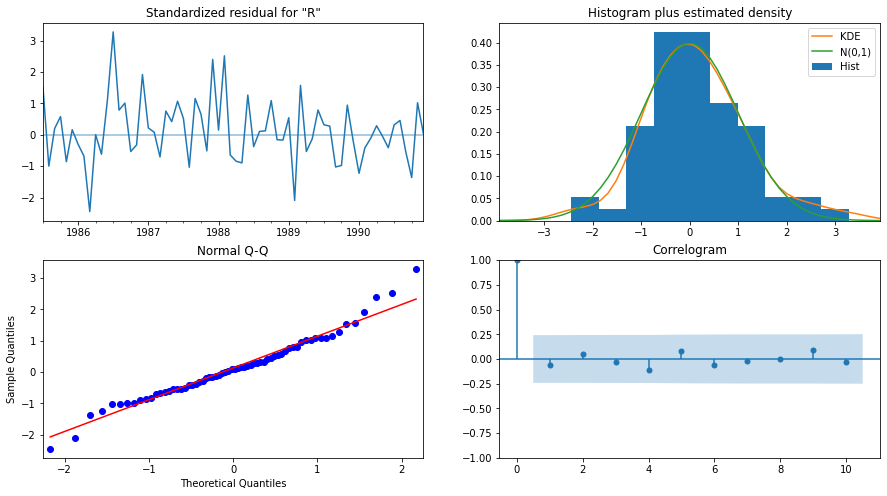

In [201]:
results_SARIMA.plot_diagnostics();

In [202]:
predicted_autoSARIMA = results_SARIMA.forecast(steps=len(Test))
predicted_autoSARIMA

1991-01-31     48.780902
1991-02-28     64.583680
1991-03-31     71.328352
1991-04-30     70.547716
1991-05-31     61.172950
1991-06-30     75.820827
1991-07-31     67.542618
1991-08-31     52.231274
1991-09-30     77.044877
1991-10-31     64.552506
1991-11-30     98.050853
1991-12-31    119.619877
1992-01-31     36.303915
1992-02-29     55.287863
1992-03-31     60.972706
1992-04-30     62.795690
1992-05-31     49.407858
1992-06-30     65.445473
1992-07-31     53.902941
1992-08-31     35.551613
1992-09-30     63.980713
1992-10-31     45.830438
1992-11-30     87.246876
1992-12-31    104.559281
1993-01-31     22.107716
1993-02-28     40.723160
1993-03-31     46.713088
1993-04-30     49.298623
1993-05-31     32.338857
1993-06-30     51.054373
1993-07-31     34.655493
1993-08-31     12.200926
1993-09-30     45.650386
1993-10-31     23.990126
1993-11-30     69.479977
1993-12-31     83.155767
1994-01-31      0.957897
1994-02-28     20.095583
1994-03-31     25.876886
1994-04-30     29.631888


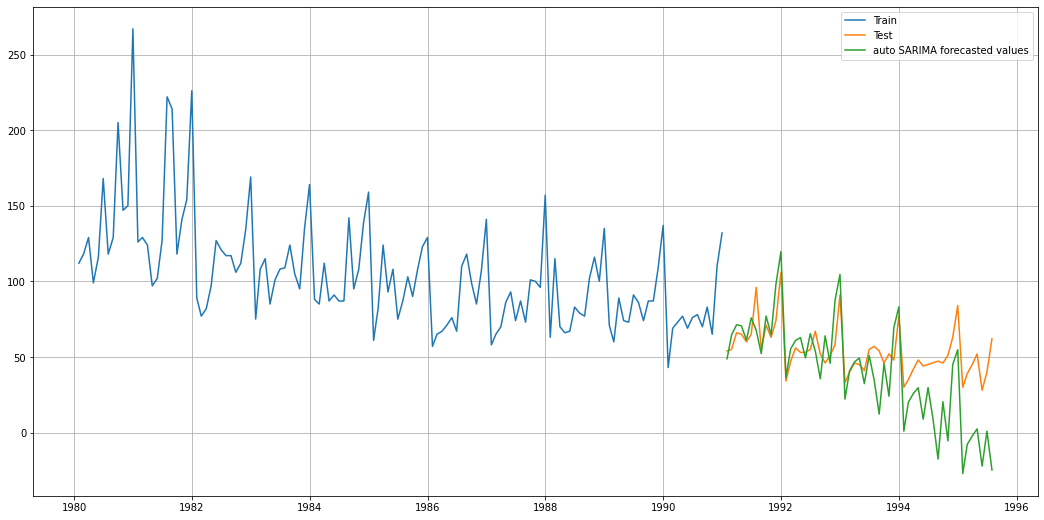

In [203]:
plt.figure(figsize=(18,9))
plt.plot(Train['Rose'], label='Train')
plt.plot(Test['Rose'], label='Test')

plt.plot(predicted_autoSARIMA, label='auto SARIMA forecasted values')

plt.legend(loc='best')
plt.grid();

In [204]:
RMSE_autoSARIMA = mean_squared_error(Test['Rose'],predicted_autoSARIMA,squared=False)
print('RMSE for the autofit SARIMA model:',RMSE_autoSARIMA)

RMSE for the autofit SARIMA model: 28.051353533770577


In [205]:
results_df12 = pd.DataFrame({'Test RMSE': [RMSE_autoSARIMA]}
                           ,index=['automated SARIMA(0,2,3)*(1,2,3,12)'])

Results_df = pd.concat([Results_df, results_df12])
Results_df

Test RMSE
RegressionOnTime                                     51.391890
NaiveModel                                           79.672238
SimpleAverageModel                                   53.413057
2pointTrailingMovingAverage                          11.529994
4pointTrailingMovingAverage                          14.444342
6pointTrailingMovingAverage                          14.554944
9pointTrailingMovingAverage                          14.721499
Alpha=0.09,SimpleExponentialSmoothing                36.748163
Alpha=0.09,SimpleExponentialSmoothing                36.779971
Alpha=0.129 and Beta=0.053,DoubleExponentialSmo...   38.232286
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       265.509912
Alpha=0.07, Beta=0.05 ,Gamma=0.4,TripleExponent...   17.759995
Alpha=0.3, Beta=0.4 ,Gamma=0.4,TripleExponentia...   11.645793
automated ARIMA(2,1,3)                               36.767896
automatedSARIMA(1,1,2)(2,0,2,6)                      26.077594
automated SARIMA(0,2,3)*(1,2,3,12)                   28.051354

## 7. Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE.

#### Manual ARIMA with cut-off values from ACF and PACF graphs

In [206]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

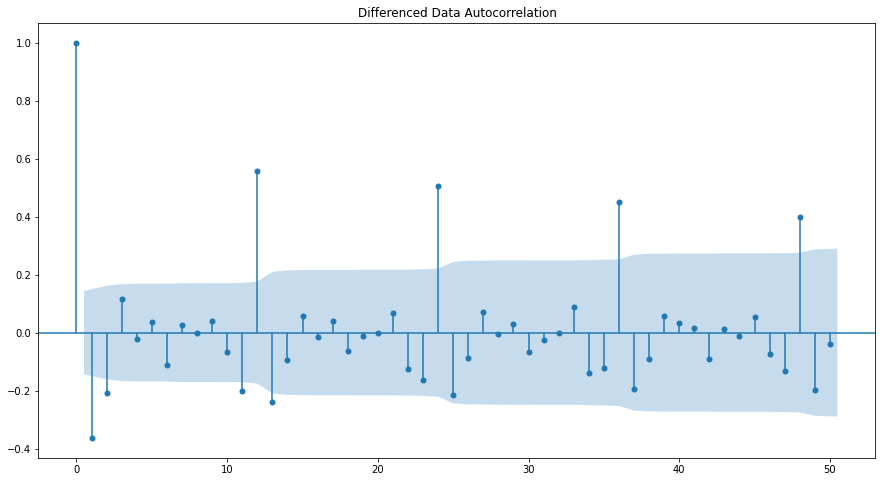

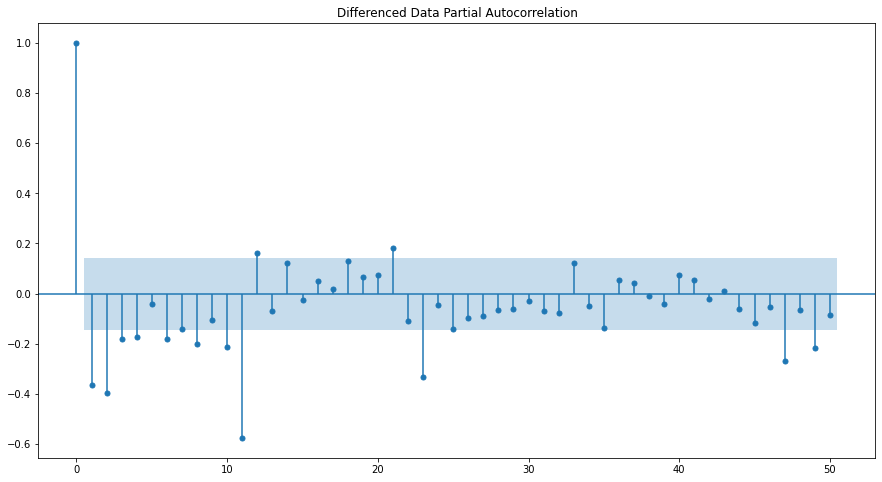

In [207]:
plot_acf(df['Rose'].diff(1).dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df['Rose'].diff(1).dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

The p value from PACF is 4 as there are 4 significant values above the cut-off 

The q value from ACF is 2 as there are 2 significant values above the cut-off 

The d values is 1 as we need single order differencing to make the series stationary

In [208]:
manual_ARIMA = ARIMA(Train['Rose'], order=(4,1,2),freq='M')

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  132
Model:                 ARIMA(4, 1, 2)   Log Likelihood                -635.859
Date:                Wed, 23 Feb 2022   AIC                           1285.718
Time:                        21:02:42   BIC                           1305.845
Sample:                    01-31-1980   HQIC                          1293.896
                         - 12-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3838      0.923     -0.416      0.677      -2.192       1.425
ar.L2          0.0046      0.258      0.018      0.986      -0.502       0.511
ar.L3          0.0414      0.113      0.366      0.7

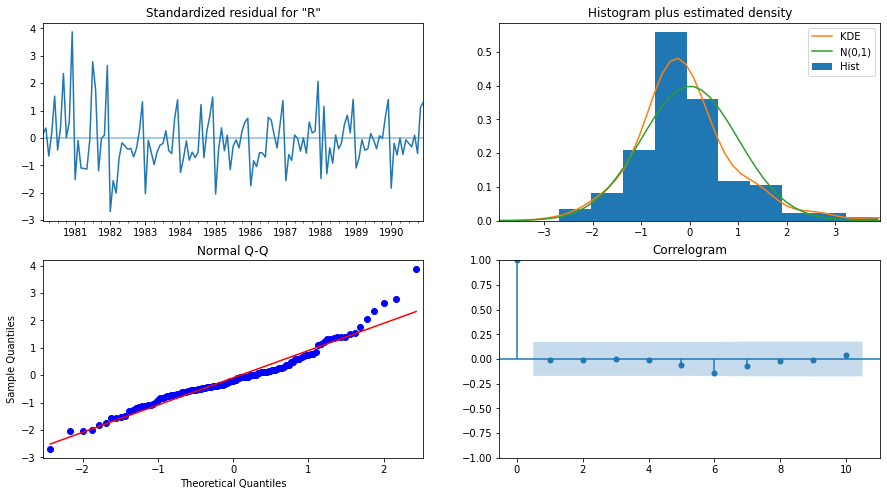

In [209]:
results_manual_ARIMA.plot_diagnostics();

In [210]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(Test))
predicted_manual_ARIMA

1991-01-31    91.224714
1991-02-28    87.036910
1991-03-31    89.124060
1991-04-30    86.496644
1991-05-31    87.562516
1991-06-30    87.250525
1991-07-31    87.255063
1991-08-31    87.310271
1991-09-30    87.270405
1991-10-31    87.287839
1991-11-30    87.283226
1991-12-31    87.283126
1992-01-31    87.284081
1992-02-29    87.283429
1992-03-31    87.283704
1992-04-30    87.283636
1992-05-31    87.283631
1992-06-30    87.283648
1992-07-31    87.283637
1992-08-31    87.283641
1992-09-30    87.283640
1992-10-31    87.283640
1992-11-30    87.283640
1992-12-31    87.283640
1993-01-31    87.283640
1993-02-28    87.283640
1993-03-31    87.283640
1993-04-30    87.283640
1993-05-31    87.283640
1993-06-30    87.283640
1993-07-31    87.283640
1993-08-31    87.283640
1993-09-30    87.283640
1993-10-31    87.283640
1993-11-30    87.283640
1993-12-31    87.283640
1994-01-31    87.283640
1994-02-28    87.283640
1994-03-31    87.283640
1994-04-30    87.283640
1994-05-31    87.283640
1994-06-30    87

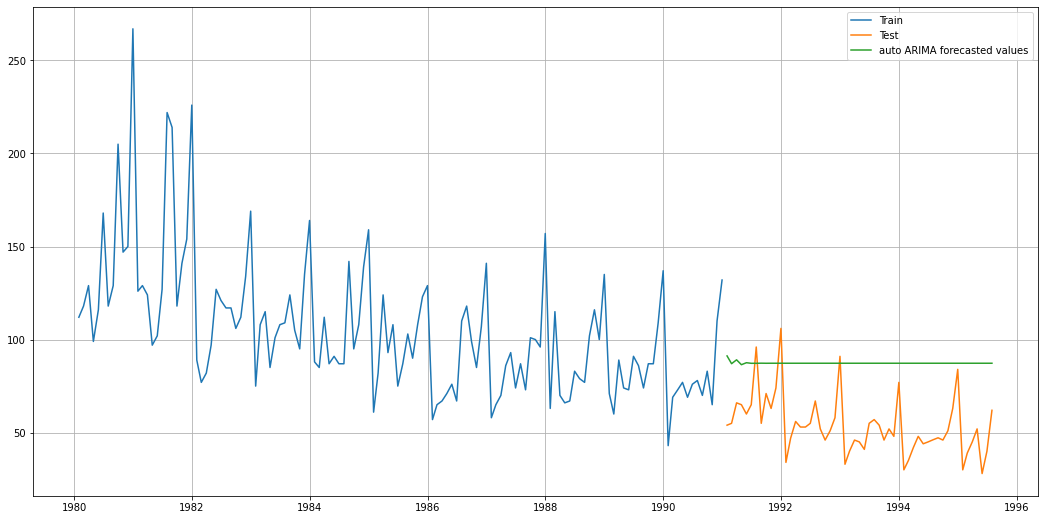

In [211]:
plt.figure(figsize=(18,9))
plt.plot(Train['Rose'], label='Train')
plt.plot(Test['Rose'], label='Test')

plt.plot(predicted_manual_ARIMA, label='auto ARIMA forecasted values')

plt.legend(loc='best')
plt.grid();

In [212]:
RMSE_manual_ARIMA = mean_squared_error(Test['Rose'],predicted_manual_ARIMA,squared=False)

print('RMSE for the manual ARIMA model:',RMSE_manual_ARIMA)

RMSE for the manual ARIMA model: 36.98966342788272


In [213]:
results_df13 = pd.DataFrame({'Test RMSE': [RMSE_manual_ARIMA]}
                           ,index=['manual ARIMA(4,1,2)'])

Results_df = pd.concat([Results_df, results_df13])
Results_df

Test RMSE
RegressionOnTime                                     51.391890
NaiveModel                                           79.672238
SimpleAverageModel                                   53.413057
2pointTrailingMovingAverage                          11.529994
4pointTrailingMovingAverage                          14.444342
6pointTrailingMovingAverage                          14.554944
9pointTrailingMovingAverage                          14.721499
Alpha=0.09,SimpleExponentialSmoothing                36.748163
Alpha=0.09,SimpleExponentialSmoothing                36.779971
Alpha=0.129 and Beta=0.053,DoubleExponentialSmo...   38.232286
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       265.509912
Alpha=0.07, Beta=0.05 ,Gamma=0.4,TripleExponent...   17.759995
Alpha=0.3, Beta=0.4 ,Gamma=0.4,TripleExponentia...   11.645793
automated ARIMA(2,1,3)                               36.767896
automatedSARIMA(1,1,2)(2,0,2,6)                      26.077594
automated SARIMA(0,2,3)*(1,2,3,12)                   28.051354
manual ARIMA(4,1,2)                                  36.989663

#### Manual SARIMA

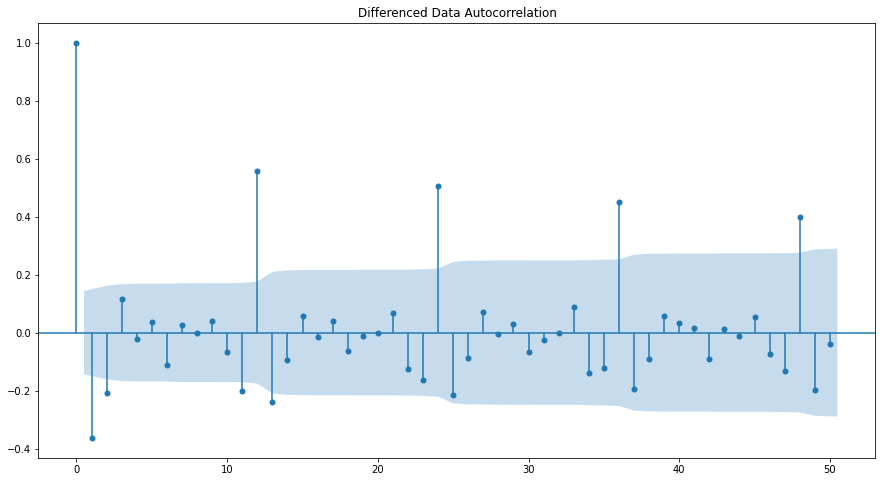

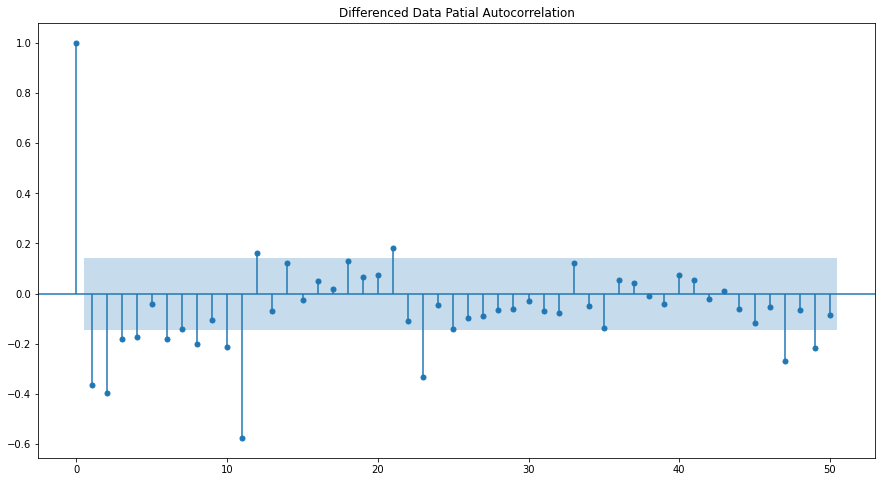

In [214]:
plot_acf(df['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df['Rose'].diff().dropna(),lags=50,title='Differenced Data Patial Autocorrelation')
plt.show()

In [215]:
import statsmodels.api as sm

manual_SARIMA = sm.tsa.statespace.SARIMAX(Train['Rose'].values,
                                order=(4,1,2),
                                seasonal_order=(4,1,2,12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA = manual_SARIMA.fit(maxiter=1000)
print(results_manual_SARIMA.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(4, 1, 2)x(4, 1, 2, 12)   Log Likelihood                -277.661
Date:                            Wed, 23 Feb 2022   AIC                            581.322
Time:                                    21:02:59   BIC                            609.983
Sample:                                         0   HQIC                           592.663
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9743      0.199     -4.900      0.000      -1.364      -0.585
ar.L2         -0.1122      0.285   

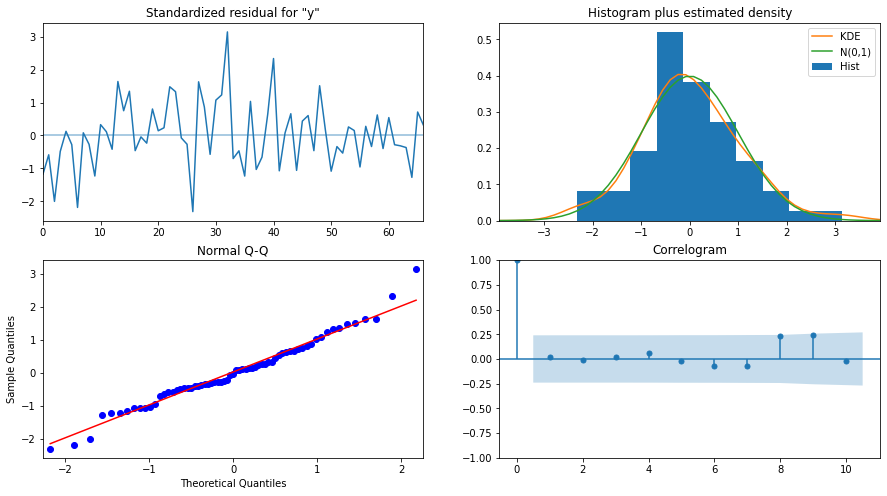

In [216]:
results_manual_SARIMA.plot_diagnostics();

In [217]:
predicted_manual_SARIMA = results_manual_SARIMA.forecast(steps=len(Test))
predicted_manual_SARIMA

array([ 46.38606909,  62.93405392,  63.52754939,  66.4727865 ,
        63.5404806 ,  67.82290195,  74.20493745,  70.55348516,
        80.75359385,  76.51441848,  95.09010286, 127.14043965,
        43.20670862,  60.3950757 ,  59.56073576,  61.81677827,
        60.53021854,  65.10314897,  70.57101563,  63.01731995,
        78.60562161,  75.01853886,  89.90521033, 125.17107841,
        40.65349435,  60.2089005 ,  57.11149621,  57.64498615,
        55.58887002,  63.69456771,  65.89567085,  58.0202262 ,
        74.9943392 ,  72.12926146,  87.39876359, 120.83083036,
        37.49051337,  54.14321198,  55.56993824,  54.57972131,
        51.77435826,  61.17308579,  62.39089407,  54.552228  ,
        69.99154668,  65.97543636,  85.45773062, 116.54994582,
        31.88705247,  49.09796627,  51.40117629,  51.52412189,
        48.14423706,  56.34761095,  58.55563252])

In [218]:
predicted_manual_SARIMA_date = pd.DataFrame(predicted_manual_SARIMA, index=Test.index, columns=Test.columns)
predicted_manual_SARIMA_date

Rose
Time_Stamp            
1991-01-31   46.386069
1991-02-28   62.934054
1991-03-31   63.527549
1991-04-30   66.472786
1991-05-31   63.540481
1991-06-30   67.822902
1991-07-31   74.204937
1991-08-31   70.553485
1991-09-30   80.753594
1991-10-31   76.514418
1991-11-30   95.090103
1991-12-31  127.140440
1992-01-31   43.206709
1992-02-29   60.395076
1992-03-31   59.560736
1992-04-30   61.816778
1992-05-31   60.530219
1992-06-30   65.103149
1992-07-31   70.571016
1992-08-31   63.017320
1992-09-30   78.605622
1992-10-31   75.018539
1992-11-30   89.905210
1992-12-31  125.171078
1993-01-31   40.653494
1993-02-28   60.208900
1993-03-31   57.111496
1993-04-30   57.644986
1993-05-31   55.588870
1993-06-30   63.694568
1993-07-31   65.895671
1993-08-31   58.020226
1993-09-30   74.994339
1993-10-31   72.129261
1993-11-30   87.398764
1993-12-31  120.830830
1994-01-31   37.490513
1994-02-28   54.143212
1994-03-31   55.569938
1994-04-30   54.579721
1994-05-31   51.774358
1994-06-30   61.173086
1994-07-31   62.390894
1994-08-31   54.552228
1994-09-30   69.991547
1994-10-31   65.975436
1994-11-30   85.457731
1994-12-31  116.549946
1995-01-31   31.887052
1995-02-28   49.097966
1995-03-31   51.401176
1995-04-30   51.524122
1995-05-31   48.144237
1995-06-30   56.347611
1995-07-31   58.555633

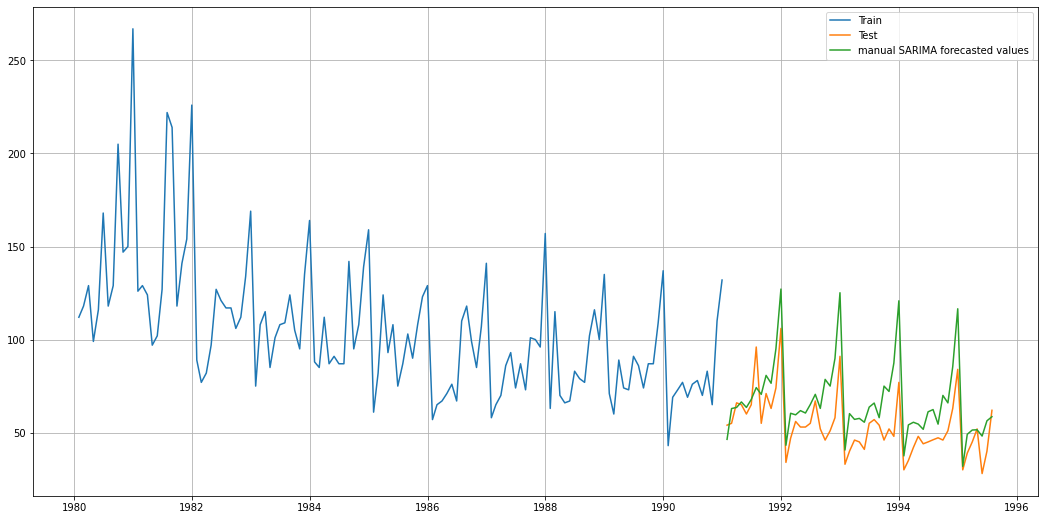

In [219]:
plt.figure(figsize=(18,9))
plt.plot(Train['Rose'], label='Train')
plt.plot(Test['Rose'], label='Test')

plt.plot(predicted_manual_SARIMA_date, label='manual SARIMA forecasted values')

plt.legend(loc='best')
plt.grid();

In [220]:
RMSE_manual_SARIMA = mean_squared_error(Test['Rose'],predicted_manual_SARIMA,squared=False)
print('RMSE for the manual SARIMA model:',RMSE_manual_SARIMA)

RMSE for the manual SARIMA model: 17.501825369836837


In [221]:
results_df14 = pd.DataFrame({'Test RMSE': [RMSE_manual_SARIMA]}
                           ,index=['manual SARIMA(4,1,2)(4,1,2,12)'])

Results_df = pd.concat([Results_df, results_df14])
Results_df

Test RMSE
RegressionOnTime                                     51.391890
NaiveModel                                           79.672238
SimpleAverageModel                                   53.413057
2pointTrailingMovingAverage                          11.529994
4pointTrailingMovingAverage                          14.444342
6pointTrailingMovingAverage                          14.554944
9pointTrailingMovingAverage                          14.721499
Alpha=0.09,SimpleExponentialSmoothing                36.748163
Alpha=0.09,SimpleExponentialSmoothing                36.779971
Alpha=0.129 and Beta=0.053,DoubleExponentialSmo...   38.232286
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       265.509912
Alpha=0.07, Beta=0.05 ,Gamma=0.4,TripleExponent...   17.759995
Alpha=0.3, Beta=0.4 ,Gamma=0.4,TripleExponentia...   11.645793
automated ARIMA(2,1,3)                               36.767896
automatedSARIMA(1,1,2)(2,0,2,6)                      26.077594
automated SARIMA(0,2,3)*(1,2,3,12)                   28.051354
manual ARIMA(4,1,2)                                  36.989663
manual SARIMA(4,1,2)(4,1,2,12)                       17.501825

## 8. Build a table (create a data frame) with all the models built along with their corresponding parameters and the respective RMSE values on the test data.

In [222]:
Results_df

Test RMSE
RegressionOnTime                                     51.391890
NaiveModel                                           79.672238
SimpleAverageModel                                   53.413057
2pointTrailingMovingAverage                          11.529994
4pointTrailingMovingAverage                          14.444342
6pointTrailingMovingAverage                          14.554944
9pointTrailingMovingAverage                          14.721499
Alpha=0.09,SimpleExponentialSmoothing                36.748163
Alpha=0.09,SimpleExponentialSmoothing                36.779971
Alpha=0.129 and Beta=0.053,DoubleExponentialSmo...   38.232286
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       265.509912
Alpha=0.07, Beta=0.05 ,Gamma=0.4,TripleExponent...   17.759995
Alpha=0.3, Beta=0.4 ,Gamma=0.4,TripleExponentia...   11.645793
automated ARIMA(2,1,3)                               36.767896
automatedSARIMA(1,1,2)(2,0,2,6)                      26.077594
automated SARIMA(0,2,3)*(1,2,3,12)                   28.051354
manual ARIMA(4,1,2)                                  36.989663
manual SARIMA(4,1,2)(4,1,2,12)                       17.501825

In [223]:
Results_df.sort_values(by=['Test RMSE'], ascending=True)

Test RMSE
2pointTrailingMovingAverage                          11.529994
Alpha=0.3, Beta=0.4 ,Gamma=0.4,TripleExponentia...   11.645793
4pointTrailingMovingAverage                          14.444342
6pointTrailingMovingAverage                          14.554944
9pointTrailingMovingAverage                          14.721499
manual SARIMA(4,1,2)(4,1,2,12)                       17.501825
Alpha=0.07, Beta=0.05 ,Gamma=0.4,TripleExponent...   17.759995
automatedSARIMA(1,1,2)(2,0,2,6)                      26.077594
automated SARIMA(0,2,3)*(1,2,3,12)                   28.051354
Alpha=0.09,SimpleExponentialSmoothing                36.748163
automated ARIMA(2,1,3)                               36.767896
Alpha=0.09,SimpleExponentialSmoothing                36.779971
manual ARIMA(4,1,2)                                  36.989663
Alpha=0.129 and Beta=0.053,DoubleExponentialSmo...   38.232286
RegressionOnTime                                     51.391890
SimpleAverageModel                                   53.413057
NaiveModel                                           79.672238
Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing       265.509912

## 9. Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.

In [224]:
final_model_1 = sm.tsa.statespace.SARIMAX(df['Rose'],
                                order=(4,1,2),
                                seasonal_order=(4, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_final_model = final_model_1.fit(maxiter=1000)
print(results_final_model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                               Rose   No. Observations:                  187
Model:             SARIMAX(4, 1, 2)x(4, 1, 2, 12)   Log Likelihood                -484.421
Date:                            Wed, 23 Feb 2022   AIC                            994.841
Time:                                    21:03:26   BIC                           1031.294
Sample:                                01-31-1980   HQIC                          1009.647
                                     - 07-31-1995                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9687      0.129     -7.515      0.000      -1.221      -0.716
ar.L2         -0.0292      0.186   

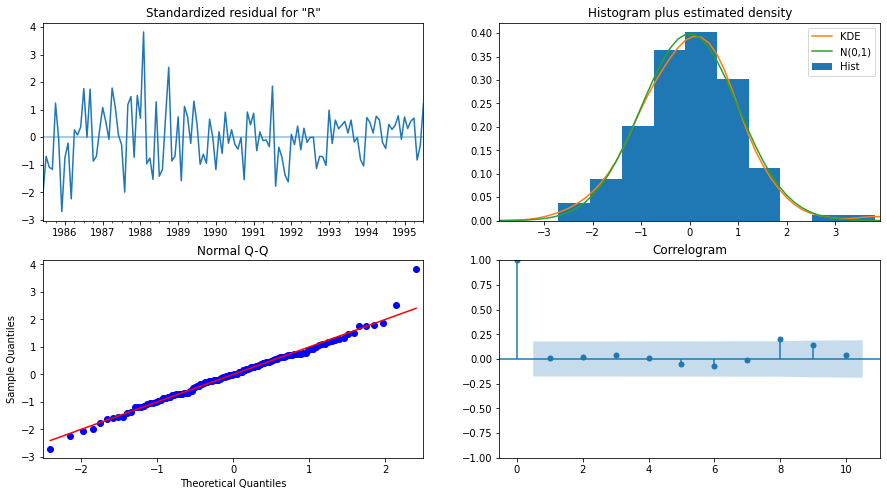

In [225]:
results_final_model.plot_diagnostics();

#### Forecasting Using the complete model

In [226]:
predicted_manual_SARIMA_final = results_final_model.get_forecast(steps=12)

In [227]:
predicted_manual_SARIMA_final.summary_frame(alpha=0.05).head()

Rose             mean    mean_se  mean_ci_lower  mean_ci_upper
1995-08-31  44.875429  12.574009      20.230824      69.520035
1995-09-30  46.011505  12.735818      21.049761      70.973248
1995-10-31  47.547412  12.786541      22.486251      72.608573
1995-11-30  59.675520  13.038372      34.120781      85.230260
1995-12-31  86.377019  13.060324      60.779255     111.974783

In [228]:
predicted_manual_SARIMA_final.summary_frame(alpha=0.05).tail()

Rose             mean    mean_se  mean_ci_lower  mean_ci_upper
1996-03-31  39.947938  13.582791      13.326157      66.569719
1996-04-30  44.160636  13.626164      17.453846      70.867426
1996-05-31  30.345261  13.820980       3.256638      57.433883
1996-06-30  39.426939  13.875556      12.231349      66.622530
1996-07-31  55.409547  14.046633      27.878651      82.940442

In [229]:
rmse_final_model = mean_squared_error(df['Rose'],results_final_model.fittedvalues,squared=False)
print('RMSE of the Final Model1',rmse_final_model)

RMSE of the Final Model1 34.868942267557216


In [230]:
pred_final_manual_SARIMA = predicted_manual_SARIMA_final.summary_frame(alpha=0.05).set_index(pd.date_range(start='1995-08-31',end='1996-07-31', freq='M'))

In [231]:
pred_final_manual_SARIMA

Rose             mean    mean_se  mean_ci_lower  mean_ci_upper
1995-08-31  44.875429  12.574009      20.230824      69.520035
1995-09-30  46.011505  12.735818      21.049761      70.973248
1995-10-31  47.547412  12.786541      22.486251      72.608573
1995-11-30  59.675520  13.038372      34.120781      85.230260
1995-12-31  86.377019  13.060324      60.779255     111.974783
1996-01-31  25.137744  13.324726      -0.978240      51.253727
1996-02-29  32.048665  13.356085       5.871219      58.226111
1996-03-31  39.947938  13.582791      13.326157      66.569719
1996-04-30  44.160636  13.626164      17.453846      70.867426
1996-05-31  30.345261  13.820980       3.256638      57.433883
1996-06-30  39.426939  13.875556      12.231349      66.622530
1996-07-31  55.409547  14.046633      27.878651      82.940442

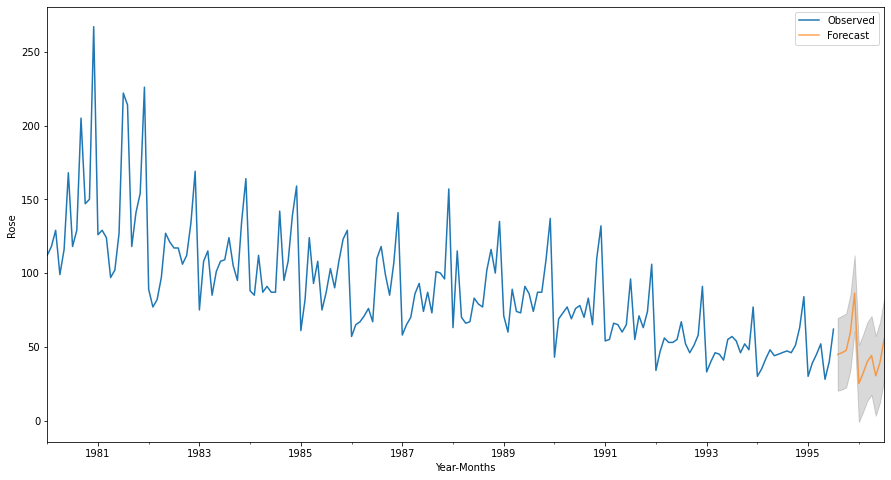

In [232]:
# plot the forecast along with the confidence band

axis = df['Rose'].plot(label='Observed')
pred_final_manual_SARIMA['mean'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(pred_final_manual_SARIMA.index, pred_final_manual_SARIMA['mean_ci_lower'], 
                  pred_final_manual_SARIMA['mean_ci_upper'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Rose')
plt.legend(loc='best')
plt.show()

In [233]:
#Evaluate the model on the whole and predict 12 months into the future
final_model2 = ExponentialSmoothing(df,
                                  trend='additive',
                                  seasonal='additive').fit(smoothing_level=0.1,
                                                                 smoothing_slope=0.4,
                                                                 smoothing_seasonal=0.3)

In [234]:
RMSE_final_model2 = metrics.mean_squared_error(df['Rose'],final_model2.fittedvalues,squared=False)

print('RMSE :',RMSE_final_model2)

RMSE : 19.447341066473314


In [235]:
prediction = final_model2.forecast(steps=12)

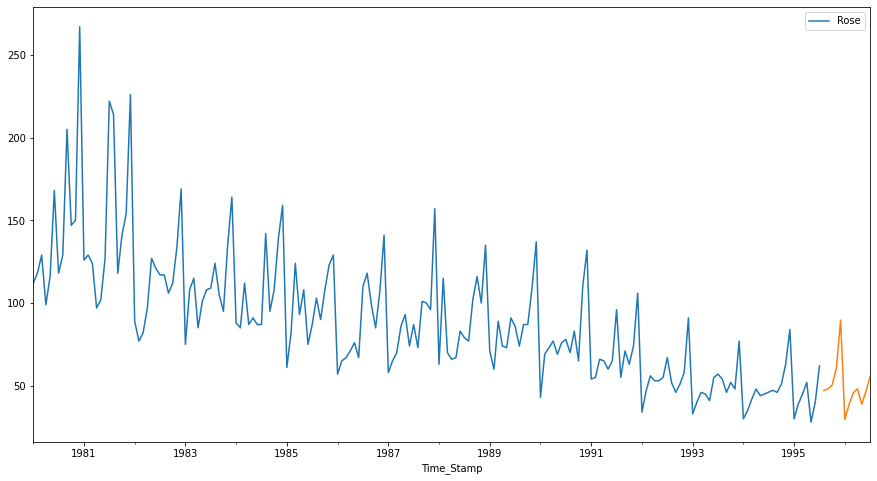

In [236]:
df.plot()
prediction.plot();

In [237]:
pred_1_df = pd.DataFrame({'lower_CI':prediction - 1.96*np.std(final_model2.resid,ddof=1),
                          'prediction':prediction,
                          'upper_ci': prediction + 1.96*np.std(final_model2.resid,ddof=1)})
pred_1_df.head()

lower_CI  prediction    upper_ci
1995-08-31   8.948162   47.159811   85.371461
1995-09-30   9.820289   48.031938   86.243588
1995-10-31  12.222223   50.433873   88.645522
1995-11-30  22.412757   60.624406   98.836056
1995-12-31  51.509671   89.721320  127.932969

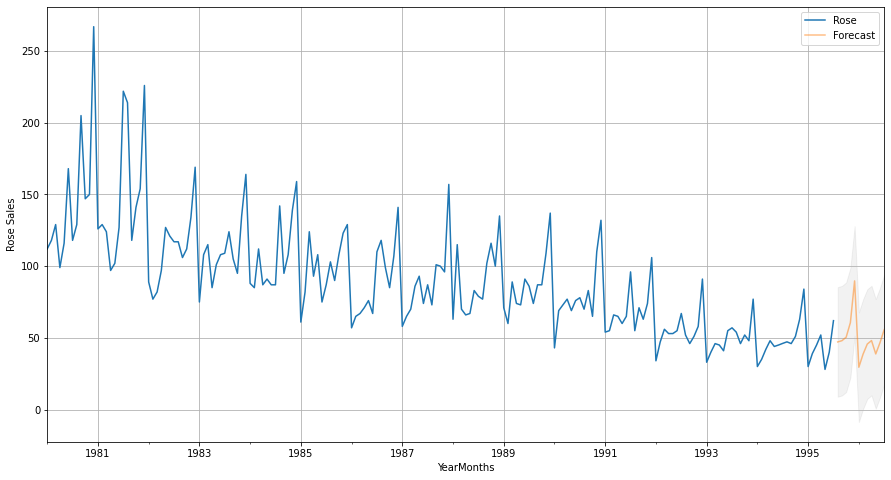

In [238]:
axis = df.plot(label='Actual', figsize=(15,8))
pred_1_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_1_df.index, pred_1_df['lower_CI'], pred_1_df['upper_ci'], color='k', alpha=.05)
axis.set_xlabel('YearMonths')
axis.set_ylabel('Rose Sales')
plt.legend(loc='best')
plt.grid()
plt.show()

## 10. Comment on the model thus built and report your findings and suggest the measures that the company should be taking for future sales.

Time series analysis involves understanding various aspects about the inherent nature of the series so that you are better informed to create meaningful and accurate forecasts.

Any time series may be split into the following components:

Base Level + Trend + Seasonality + Error


#### Observations:

Rose sales shows decrease in trend compared to the previous years.

December month shows the highest sales.

The models are chosen based on least RMSE score.

The sales of Rose wine is seasonal and also had trend. Therefore, the company cannot have the same stock throughout the year.

The Company should use prediction results to plan about future stock.


#### Insights:

The models are built considering the Trend and Seasonality in to account and we see from the output plot that the future prediction is in line with the trend and seasonality in the previous years.

The company should use the prediction results and capitalize on the high demand seasons and ensure to source and supply the high demand.

The company should use the prediction results to plan the low demand seasons to stock as per the demand. Products that are discounted should be highlighted so consumers can see the savings prominently Discounts can compel consumers to buy.

As we know how the seasonality is in the prediction company cannot have the same stock through the year. 

You should create a dynamic consumer experience with fresh point -of-sale materials and well stocked displays. Displays need to look fresh and interesting and tell a compelling story about why the consumer should purchase the product. 

Seasonal memberships and discounts can be introduced. Consumers get very excited about savings and appreciate discounts being passed on. 

Many prominent retailers also have loyalty programs or club member cards that create excitement. A club -member price brings consumers back and improve sales 

Events and tastings help draw consumers to your store and generate sales. Retailers with economies of scale successfully sample consumers on more profitable wines. 

Some even comparison -taste customers on national brands that are more expensive to demonstrate they are offering a less expensive but superior product. 

And bringing in celebrities, sommeliers or trade reps for tastings can help create excitement and drive traffic.
